# Import

In [12]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytimec
import statsmodels.tsa.stattools as tsa
import statsmodels.stats.weightstats as wst
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, ttest_1samp, norm, mannwhitneyu, linregress, wilcoxon, sem, pearsonr, spearmanr, normaltest
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
import pingouin as pg
from brokenaxes import brokenaxes

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LIGHT_LASER=  '#8CB1F3'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
#PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#V1
PHASE_COLORS = ['#E2CAE3','#C27AC5','#764979','#B9D3F7','#5181C2','#3C557A']#V2

#retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn_animals = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn_animals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
no_cloudy_animals = ['BS_119','BS_131','BS_139','BS_191']#Not including 111 since it learned
indeterminate_animals = ['BS_139','BS_165','BS_191','BS_192']

ephys_animals = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
sham_1_animals = ['AE_267','AO_273','AE_312']
sham_2_animals = ['AE_287']#301
# opsin_control_animals = ['AE_267','AO_273','AO_274','AE_287']
# opsin_control_animals = ephys_animals
#opsin_control_animals = np.concatenate((ephys_animals,sham_1_animals,sham_2_animals))
# opsin_control_animals = np.concatenate((sham_1_animals,sham_2_animals))

# opsin_control_animals = np.concatenate((ephys_animals,['AE_312']))#Fig 4e
opsin_control_animals = ['AE_287']#Fig 4c


all_opsin_animals = np.concatenate((did_learn_animals,did_not_learn_animals,indeterminate_animals))

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
#act_directory = 'D:\\Opsin_Cache'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

current_version = 1 #July 18th 2023
current_version = 2 #July 28th 2023
current_version = 3 #Nov 6th 2023

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
passivedecodingfilename = 'D:\\stimdecoding_25s_passive.csv'
choicedecodingfilename = 'D:\\choicedecoding.csv'
# opsindecodingfilename = 'D:\\stimdecoding_25s_opsin.csv'
opsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'

stdfont = 14
stdyfrac = 0.06

In [13]:
animals = did_not_learn_animals

In [14]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)
../..\InsanallyLabEphysTools\behavior.py:94: RuntimeWarning: invalid value encountered in long_scala

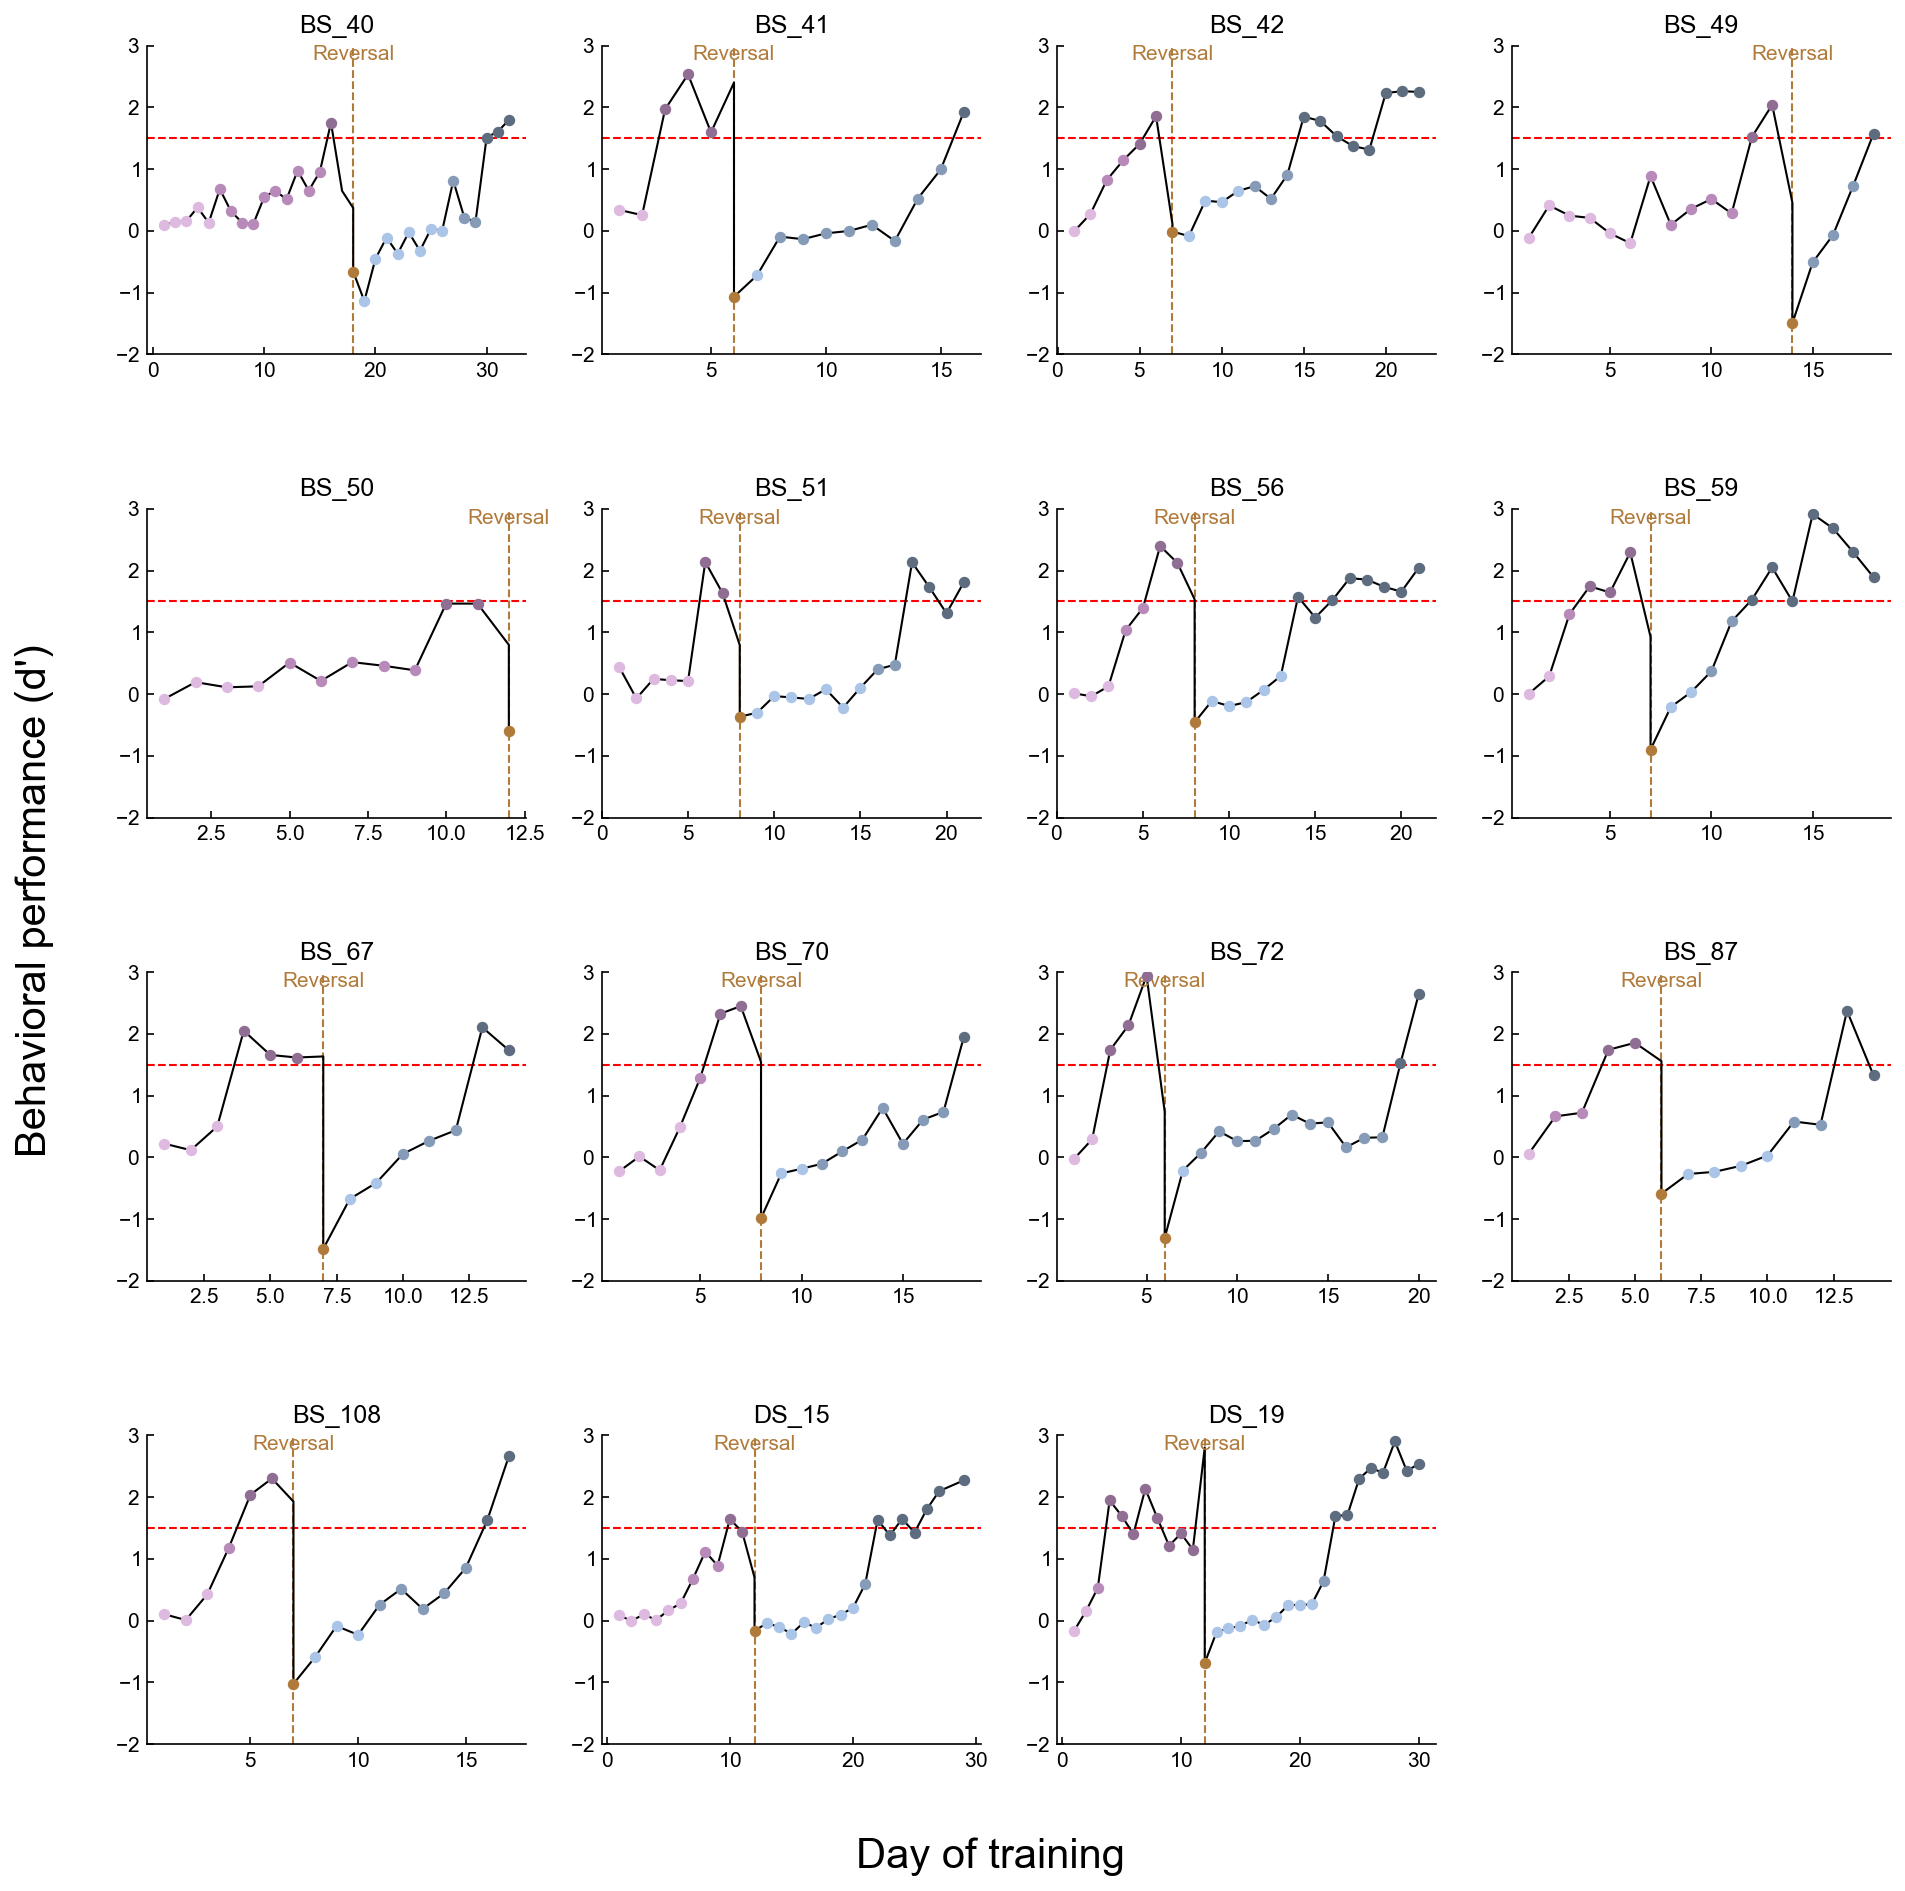

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


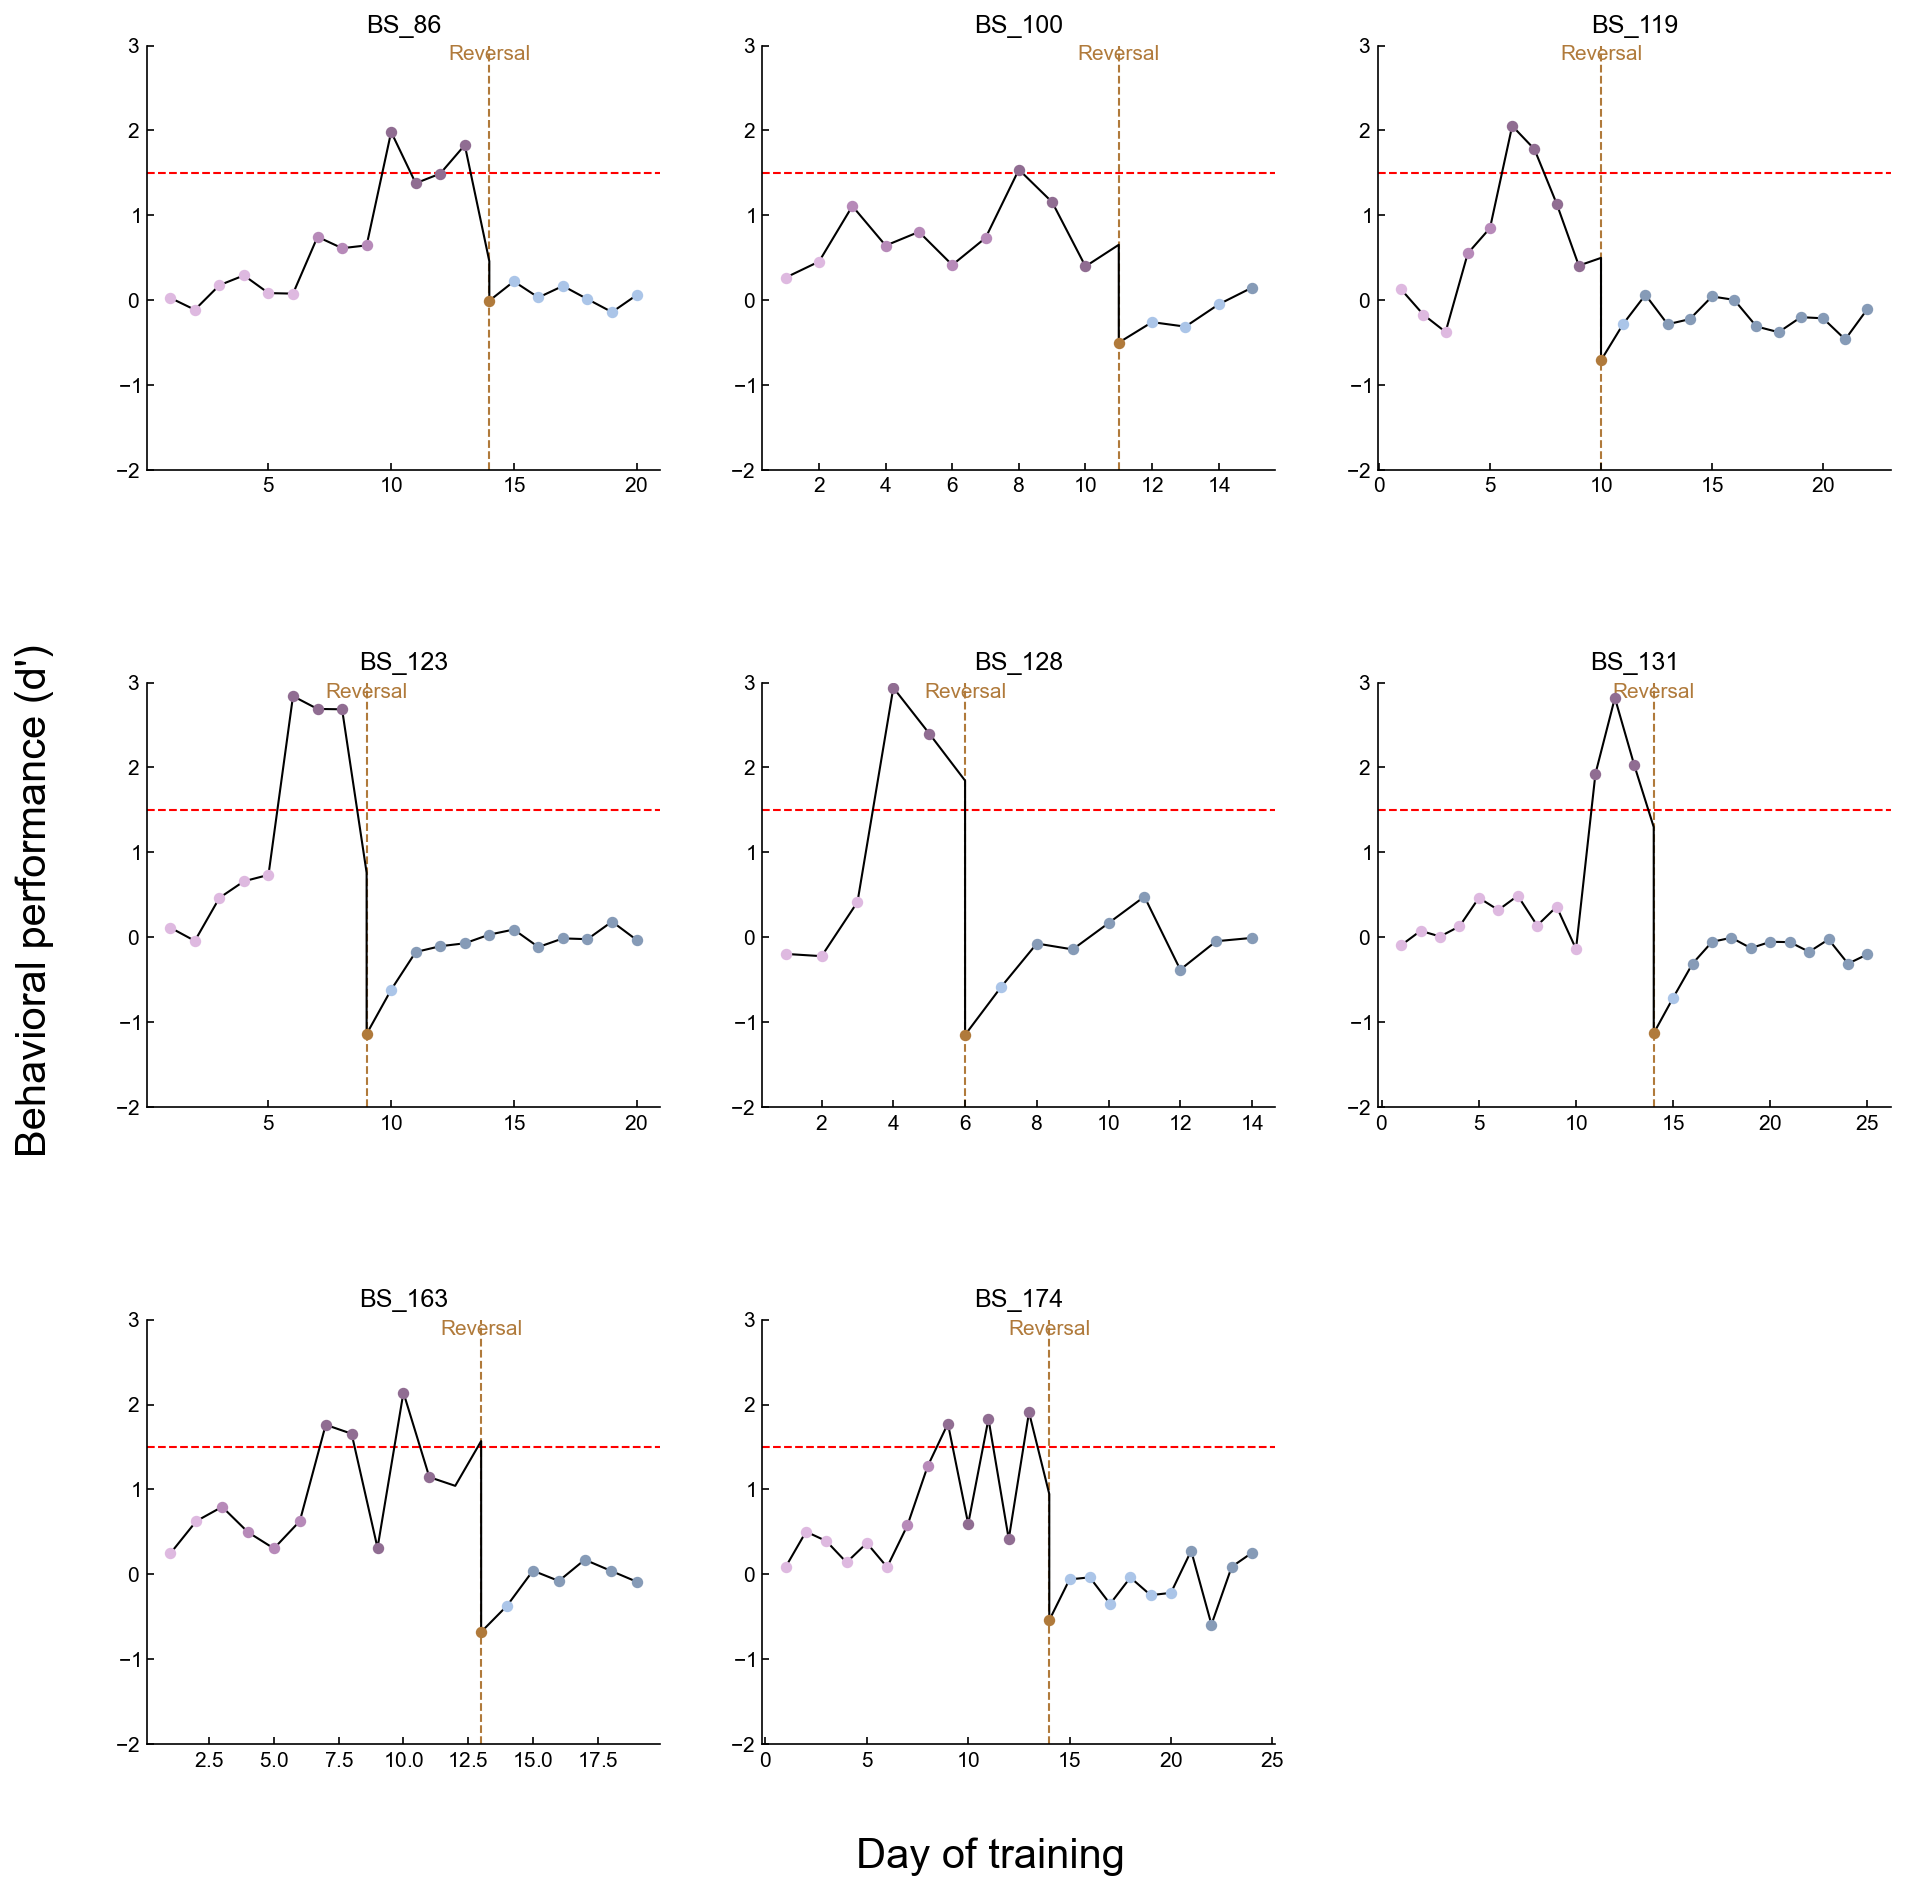

posx and posy should be finite values
posx and posy should be finite values


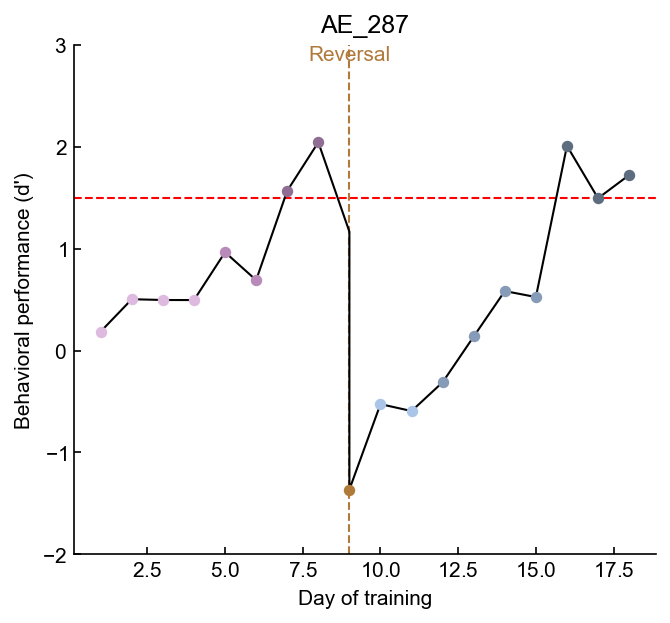

In [15]:
learning_phases,_,_ = ilep.calculateLearningPhasesV2(ephys_animals,animalBehaviors,plot=True,noTrim=False)
learning_phases2,_,_ = ilep.calculateLearningPhasesV2(did_not_learn_animals,animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
# learning_phasesx,_,_ = ilep.calculateLearningPhasesV2(['BS_111'],animalBehaviors,plot=True,noTrim=False,noTrimPost=True)
learning_phases3,_,_ = ilep.calculateLearningPhasesV2(opsin_control_animals,animalBehaviors,plot=True,noTrim=False)
for d in learning_phases2:
    learning_phases[d] = learning_phases2[d]
for d in learning_phases3:
    learning_phases[d] = learning_phases3[d]

# Opto

In [16]:
animals_in_cache = []

EnumSessionOps = []
EnumClustOps = []

for session in tqdm(os.listdir(ops_directory)):
    
    if session in ['BS_174_5_opto_AC.pickle']:     #This session excluded due to excessive gliosis (prevented recording the two days prior. Retired immediately after)
        continue
    
    sessionfile = ilep.loadSessionCached(ops_directory,session)
            
    if sessionfile.meta.animal not in did_not_learn_animals:
        continue
#     if sessionfile.meta.animal not in no_cloudy_animals:
#         continue
    
    if hasattr(animalBehaviors[sessionfile.meta.animal],'cloudiness') and sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
        continue
    
    animals_in_cache.append(sessionfile.meta.animal)
    
    for clust in sessionfile.clusters.good:
        if sessionfile.meta.region == "AC":
            EnumSessionOps.append(session)
            EnumClustOps.append(clust)
        
animals_in_cache = np.unique(animals_in_cache)

100%|██████████| 167/167 [00:02<00:00, 67.93it/s] 


In [17]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
passive_df = pd.read_csv(passivedecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
# opsin_df = pd.read_csv(opsindecodingfilename)
opsinon_df = pd.read_csv(opsinondecodingfilename)
dec_df = pd.concat([stim_25s_df,choice_df,passive_df,opsinon_df])

def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')
        
stim_acc = []
stim_acc_s = []
choice_acc_s = []
pval_stim_s = []
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus_on','pval_synthetic_control')
    stim_acc.append(stim_accuracy)
    pval_stim_s.append(pvalue_stim_s)
stim_acc = np.array(stim_acc)
pval_stim_s = np.array(pval_stim_s)

def get_TE_mask(acc,pval_s,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    is_valid_pval = np.less(pval_s,0.05) #np.less(pval_c,0.05))
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_Ops,task_encoder_threshold_Ops = get_TE_mask(stim_acc,pval_stim_s,None)

854it [00:02, 409.89it/s]

Task encoder threshold: 0.5855125094850949


In [18]:
# #Define 6 learning phases(days)
# pre_early = 4
# pre_late = 6
# pre_expert = 8
# post_early = 12
# post_late = 15
# post_expert = 16

# #
# FRmod_Ops_preearly = [np.nan]
# FRmod_Ops_prelate = [np.nan]
# FRmod_Ops_preexpert = [np.nan]
# FRmod_Ops_postearly = []
# FRmod_Ops_postlate = []
# FRmod_Ops_postexpert = []
# ChoiceMod_Ops_postearly = []
# ChoiceMod_Ops_postlate = []
# ChoiceMod_Ops_postexpert = []

# #
# FRmod_Ops_ON_preearly = [np.nan]
# FRmod_Ops_ON_prelate = [np.nan]
# FRmod_Ops_ON_preexpert = [np.nan]
# FRmod_Ops_ON_postearly = []
# FRmod_Ops_ON_postlate = []
# FRmod_Ops_ON_postexpert = []
# ChoiceMod_Ops_ON_postearly = []
# ChoiceMod_Ops_ON_postlate = []
# ChoiceMod_Ops_ON_postexpert = []

# #
# FRmod_Ops_OFF_preearly = [np.nan]
# FRmod_Ops_OFF_prelate = [np.nan]
# FRmod_Ops_OFF_preexpert = [np.nan]
# FRmod_Ops_OFF_postearly = []
# FRmod_Ops_OFF_postlate = []
# FRmod_Ops_OFF_postexpert = []
# ChoiceMod_Ops_OFF_postearly = []
# ChoiceMod_Ops_OFF_postlate = []
# ChoiceMod_Ops_OFF_postexpert = []

# #
# preexpert_session_num = []
# postlate_session_num = []
# postexpert_session_num = []


In [19]:
# preearly_Ops_animal = []
# prelate_Ops_animal = []
# preexpert_Ops_animal = []
# postearly_Ops_animal = []
# postlate_Ops_animal = []
# postexpert_Ops_animal = []

# pre_early_session = []

# for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    
#     sessionfile = ilep.loadSessionCached(ops_directory,session)
#     rev_day = animalBehaviors[sessionfile.meta.animal].reversal
#     day_relative_to_rev = sessionfile.meta.day_of_training - rev_day

#     if day_relative_to_rev < 1:
#         continue
        
# #     if not is_TE_Ops[idx]:
# #         continue
    
#     try:
#         FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
#         FRmod_on = sessionfile.responsiveness[clust]['laser_on'].FRmodulation
#         FRmod_off = sessionfile.responsiveness[clust]['laser_off'].FRmodulation
#     except Exception as e:
#         print(f"{session} cluster {clust} has error: {e}")
#         FRmod = np.nan
#         FRmod_on = np.nan
#         FRmod_off = np.nan

#     try:
#         Choicemod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation_choice
#         Choicemod_on = sessionfile.responsiveness[clust]['laser_on'].FRmodulation_choice
#         Choicemod_off = sessionfile.responsiveness[clust]['laser_off'].FRmodulation_choice
#     except Exception as e:
#         print(f"{session} cluster {clust} has error: {e}")
#         Choicemod = np.nan
#         Choicemod_on = np.nan
#         Choicemod_off = np.nan
    
# #     #1,2,3,4
# #     if sessionfile.meta.day_of_training <= pre_early:
# #         FRmod_Ops_preearly.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
# #         preearly_Ops_animal.append(sessionfile.meta.animal)
# #         pre_early_session.append(session)
        
# #     #5,6
# #     if sessionfile.meta.day_of_training <= pre_late and sessionfile.meta.day_of_training >pre_early:
# #         FRmod_Ops_prelate.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
# #         prelate_Ops_animal.append(sessionfile.meta.animal)
    
# #     #7,8
# #     if sessionfile.meta.day_of_training <= pre_expert and sessionfile.meta.day_of_training >pre_late:
# #         FRmod_Ops_preexpert.append(sessionfile.responsiveness[clust]['all_trials'].FRmodulation)
# #         preexpert_session_num.append(sessionfile.meta.files)
# #         preexpert_Ops_animal.append(sessionfile.meta.animal)
        
# #     print(day_relative_to_rev)
    
#     #9,10,11,12
#     if day_relative_to_rev in [1,2]:#[1,2,3,4]:
# #     if day_relative_to_rev in [1,2,3,4]:
#         FRmod_Ops_postearly.append(FRmod)
#         FRmod_Ops_ON_postearly.append(FRmod_on)
#         FRmod_Ops_OFF_postearly.append(FRmod_off)
#         ChoiceMod_Ops_postearly.append(Choicemod)
#         ChoiceMod_Ops_ON_postearly.append(Choicemod_on)
#         ChoiceMod_Ops_OFF_postearly.append(Choicemod_off)
#         postearly_Ops_animal.append(sessionfile.meta.animal)

#     #13,14,15
#     if day_relative_to_rev in [3,4]:#[5,6,7]:
# #     if day_relative_to_rev in [5,6,7]:
#         FRmod_Ops_postlate.append(FRmod)
#         FRmod_Ops_ON_postlate.append(FRmod_on)
#         FRmod_Ops_OFF_postlate.append(FRmod_off)
#         ChoiceMod_Ops_postlate.append(Choicemod)
#         ChoiceMod_Ops_ON_postlate.append(Choicemod_on)
#         ChoiceMod_Ops_OFF_postlate.append(Choicemod_off)
#         postlate_session_num.append(sessionfile.meta.files)
#         postlate_Ops_animal.append(sessionfile.meta.animal)
    
#     #16,17,18,19,20,21
#     if day_relative_to_rev >= 5:#8:
# #     if day_relative_to_rev >= 8:
#         FRmod_Ops_postexpert.append(FRmod)
#         FRmod_Ops_ON_postexpert.append(FRmod_on)
#         FRmod_Ops_OFF_postexpert.append(FRmod_off)
#         ChoiceMod_Ops_postexpert.append(Choicemod)
#         ChoiceMod_Ops_ON_postexpert.append(Choicemod_on)
#         ChoiceMod_Ops_OFF_postexpert.append(Choicemod_off)
#         postexpert_session_num.append(sessionfile.meta.files)
#         postexpert_Ops_animal.append(sessionfile.meta.animal)
    

In [20]:
FRmod_delta_abs = []
FRmod_delta_pc_baseline = []
FRmod_delta_pc = []
FRmod_delta_pc_target = []
FRmod_delta_pc_nontarget = []
FRmod_on = []
FRmod_off = []
FRmod_on_target = []
FRmod_off_target = []
FRmod_on_nontarget = []
FRmod_off_nontarget = []
FRmod_on_tuning = []
FRmod_off_tuning = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.animal not in did_not_learn_animals:
        continue
    
    if sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
        continue
        
    if not sessionfile.meta.task == 'opto reversal':
        continue

    on = sessionfile.responsiveness[clust]['laser_on'].FRmodulation
    off = sessionfile.responsiveness[clust]['laser_off'].FRmodulation
    ontarget = sessionfile.responsiveness[clust]['laser_on_target'].FRmodulation
    offtarget = sessionfile.responsiveness[clust]['laser_off_target'].FRmodulation
    onnontarget = sessionfile.responsiveness[clust]['laser_on_nontarget'].FRmodulation
    offnontarget = sessionfile.responsiveness[clust]['laser_off_nontarget'].FRmodulation
    offbaseline = sessionfile.responsiveness[clust]['laser_off'].FRbaseline

    try:
        FRmod_on.append(on)
        FRmod_off.append(off)
        FRmod_on_target.append(ontarget)
        FRmod_off_target.append(offtarget)
        FRmod_on_nontarget.append(onnontarget)
        FRmod_off_nontarget.append(offnontarget)
        FRmod_delta_abs.append( (on-off) )
        FRmod_delta_pc_baseline.append( (on-off)/offbaseline*100 )
        FRmod_delta_pc.append( (on-off)/off*100 )
        FRmod_delta_pc_target.append( (ontarget-offtarget)/offtarget*100 )
        FRmod_delta_pc_nontarget.append( (onnontarget-offnontarget)/offnontarget*100 )
        
        print(f"on: {ontarget}, off: {onnontarget}, ->: {(ontarget-onnontarget) / (ontarget+onnontarget)}")
#         print(f"on: {offtarget}, off: {offnontarget}, ->: {(offtarget-offnontarget) / (offtarget+offnontarget)}")
        
        FRmod_on_tuning.append((ontarget-onnontarget) / (ontarget+onnontarget))
        FRmod_off_tuning.append((offtarget-offnontarget) / (offtarget+offnontarget))
        
    except Exception as e:
        print(session + ': '+ str(e))
        
FRmod_off = np.array(FRmod_off)
FRmod_off_target = np.array(FRmod_off_target)
FRmod_off_nontarget = np.array(FRmod_off_nontarget)
FRmod_on_target = np.array(FRmod_on_target)
FRmod_on_nontarget = np.array(FRmod_on_nontarget)
FRmod_delta_pc = np.array(FRmod_delta_pc)
FRmod_delta_pc_target = np.array(FRmod_delta_pc_target)
FRmod_delta_pc_nontarget = np.array(FRmod_delta_pc_nontarget)
FRmod_on_tuning = np.array(FRmod_on_tuning)
FRmod_off_tuning = np.array(FRmod_off_tuning)

29it [00:00, 64.92it/s]

on: 1.5833333333333333, off: 2.796610169491527, ->: -0.2770074169622705
on: 6.5607344632768365, off: 7.137345679012345, ->: -0.042094308818896045
on: 2.196327683615819, off: 3.1790123456790123, ->: -0.18281348839472533
on: 2.31638418079096, off: 3.4182098765432083, ->: -0.1921366507788089
on: 1.4053672316384183, off: 4.166666666666665, ->: -0.4955640050697083
on: 0.3389830508474577, off: 2.2993827160493825, ->: -0.7430355903638346
on: 1.5042372881355937, off: 2.993827160493827, ->: -0.33116241204861296
on: 1.10062893081761, off: 1.8939393939393936, ->: -0.26491646778042954
on: 1.2771739130434783, off: 1.9507575757575766, ->: -0.2086734693877553
on: 3.050847457627119, off: 3.8657407407407414, ->: -0.11781723296840436
on: 6.694915254237291, off: 4.552469135802466, ->: 0.1904839422339021
on: 5.918079096045197, off: 9.436728395061728, ->: -0.22915619756577435
on: 8.4037558685446, off: 8.18840579710145, ->: 0.012979024420249691
on: 0.8545197740112989, off: 3.749999999999999, ->: -0.62883435

57it [00:00, 107.49it/s]

on: 1.9774011299435033, off: 4.953703703703702, ->: -0.4294124306577604
on: 0.5994152046783626, off: 4.640522875816993, ->: -0.771212867224684
on: 8.516949152542377, off: 9.205246913580252, ->: -0.03883817549866803
on: 2.514619883040935, off: 5.9795321637426895, ->: -0.4079173838209983
on: 10.154761904761903, off: 12.964285714285717, ->: -0.12152420185375919
on: 3.9523809523809534, off: 4.273809523809524, ->: -0.03907380607814746
on: 2.4761904761904754, off: 4.2857142857142865, ->: -0.26760563380281716
on: 2.20679012345679, off: 0.6666666666666667, ->: 0.5359828141783028
on: 6.927083333333334, off: 10.911764705882353, ->: -0.22337100264486653
on: 3.5565476190476195, off: 6.6060606060606055, ->: -0.30007188307020566
on: 4.874999999999998, off: 7.931372549019606, ->: -0.2386602870813398
on: 2.010416666666666, off: 3.5784313725490207, ->: -0.2805613419581189
on: 6.340206185567009, off: 2.4826388888888897, ->: 0.43722487067653903
on: 3.109965635738831, off: 22.994791666666675, ->: -0.76173

98it [00:01, 67.79it/s] 

on: 2.5595238095238084, off: 3.472222222222221, ->: -0.15131578947368424
on: 3.0952380952380953, off: 0.9375, ->: 0.5350553505535056
on: 4.19973544973545, off: 2.3784722222222214, ->: 0.2768631393741362
on: 1.8849206349206349, off: 1.3802083333333337, ->: 0.15457652867451563
on: 1.0383597883597877, off: 1.3975694444444453, ->: -0.14746309180383566
on: 12.268518518518514, off: 9.314236111111112, ->: 0.13688161952004263
on: 3.4782608695652173, off: 2.86764705882353, ->: 0.09622166246851376
on: 1.6079812206572768, off: 3.2121212121212106, ->: -0.33280205427900994
on: 1.388888888888889, off: 2.6576576576576576, ->: -0.3135435992578849
on: 1.2922705314009661, off: 2.763888888888889, ->: -0.3628107786214083
on: 6.7824074074074066, off: 2.069444444444444, ->: 0.5324267782426777
on: 7.9304029304029315, off: 14.932432432432432, ->: -0.3062625169147496
on: 2.774725274725275, off: 4.256756756756757, ->: -0.21077085533262935
on: 4.148351648351648, off: 1.2612612612612615, ->: 0.5336962986686186
on

122it [00:01, 81.94it/s]

on: 2.5549450549450543, off: 2.882882882882883, ->: -0.060306768012380135
on: 3.45679012345679, off: 2.6893939393939394, ->: 0.12485733850719011
on: 1.8197278911564625, off: 2.2747747747747753, ->: -0.11113605747642583
on: 9.166666666666664, off: 7.072072072072071, ->: 0.12898751733703182
on: 5.274725274725274, off: 5.833333333333334, ->: -0.0502885408079144
on: 1.956214689265536, off: 3.8050314465408808, ->: -0.3209057057612695
on: 3.1051587301587307, off: 5.533333333333334, ->: -0.2810877853828839
on: 37.16807909604521, off: 59.78773584905659, ->: -0.2332986089160207
on: 1.032608695652174, off: 2.1653005464480874, ->: -0.35419762258543824
on: 1.2209302325581395, off: 4.072104018912531, ->: -0.5386652817450014
on: 3.682170542635661, off: 4.438534278959811, ->: -0.09314015875971061
on: 0.7580321285140563, off: 1.2165450121654502, ->: -0.2322081392543656
on: 5.318627450980391, off: 3.392857142857143, ->: 0.22106109324758833
on: 1.4003436426116838, off: 0.8712121212121214, ->: 0.23293794

131it [00:01, 79.10it/s]

on: 0.5170316301703164, off: 0.47916666666666663, ->: 0.038009464203938456
on: 1.2289029535864977, off: 0.7697201017811703, ->: 0.22974960214338955
on: 0.9381237524950101, off: 1.436170212765958, ->: -0.2097661315565891
on: 1.7676767676767675, off: 1.3768115942028987, ->: 0.12430167597765354
on: 1.4583333333333335, off: 1.6743827160493827, ->: -0.06896551724137927
on: 2.7927927927927927, off: 1.95970695970696, ->: 0.17529424018331413
on: 0.39244186046511675, off: 0.8510638297872343, ->: -0.3688137279283756
on: 15.166666666666666, off: 18.08219178082192, ->: -0.08768797637849349
on: 8.41503267973856, off: 6.696428571428568, ->: 0.11372851901911585
on: 9.457364341085269, off: 11.784869976359333, ->: -0.10956971853769001
on: 5.45058139534884, off: 3.445626477541371, ->: 0.2253718602863645
on: 1.3102725366876307, off: 5.031328320802005, ->: -0.586769156201259
on: 1.0185185185185186, off: 1.2051282051282055, ->: -0.08392056374119165
on: 1.8044077134986225, off: 4.341666666666668, ->: -0.412

151it [00:02, 87.16it/s]

on: 8.22314049586777, off: 5.424999999999998, ->: 0.2050199070499723
on: 1.0341365461847392, off: 1.0384615384615383, ->: -0.002086749142942152
on: 10.137741046831957, off: 12.283333333333333, ->: -0.09569533779342285
on: 15.160256410256407, off: 13.59550561797753, ->: 0.054415208706433224
on: 1.1879432624113477, off: 2.933333333333333, ->: -0.4235071416279469
on: 0.9116809116809115, off: 0.945692883895131, ->: -0.018311861777758672
on: 0.8434959349593495, off: 0.9972677595628416, ->: -0.0835369716716446
on: 4.869146005509642, off: 2.6500000000000004, ->: 0.2951327190459616
on: 0.66006600660066, off: 2.799625468164794, ->: -0.6184249310002947
on: 2.610192837465565, off: 0.675, ->: 0.5890652187585166
on: 0.9274193548387095, off: 1.515151515151515, ->: -0.2406203101550775
on: 1.1639118457300273, off: 2.166666666666667, ->: -0.3010752688172045
on: 3.5582010582010577, off: 2.234299516908213, ->: 0.22855440826052403
on: 1.350574712643678, off: 0.9153005464480874, ->: 0.19209979209979205
on:

176it [00:02, 95.36it/s]

on: 0.6349206349206349, off: 0.31400966183574885, ->: 0.3381818181818181
on: 5.11904761904762, off: 3.983739837398374, ->: 0.12472089314194588
on: 4.196428571428572, off: 2.611788617886179, ->: 0.232754024949355
on: 6.634615384615385, off: 4.597701149425288, ->: 0.18134409131162055
on: 2.539682539682539, off: 1.9207317073170724, ->: 0.13876532494304009
on: 13.938492063492065, off: 11.829268292682931, ->: 0.08185514540861828
on: 2.2619047619047614, off: 2.0528455284552845, ->: 0.048452220726783235
on: 2.194444444444444, off: 3.2711442786069647, ->: -0.1969961313813244
on: 12.371031746031747, off: 13.211382113821143, ->: -0.03284875197442484
on: 2.0772946859903385, off: 2.0777777777777775, ->: -0.00011626555051723259
on: 7.696540880503145, off: 7.474226804123711, ->: 0.014654108546182081
on: 11.563670411985022, off: 3.467078189300411, ->: 0.5386685944565788
on: 11.212686567164177, off: 14.0564738292011, ->: -0.11253983976634119
on: 1.8079096045197742, off: 0.7063492063492064, ->: 0.43812

311it [00:07, 46.95it/s]

on: 2.380952380952381, off: 35.581140350877206, ->: -0.8745615844852487
on: 5.706521739130435, off: 15.984848484848483, ->: -0.47384405132488033
on: 5.878623188405798, off: 8.257575757575754, ->: -0.16828799440787534
on: 0.8888888888888888, off: 1.3605442176870746, ->: -0.20967741935483863
on: 1.997716894977169, off: 3.472222222222222, ->: -0.2695652173913043
on: 2.154088050314465, off: 1.52046783625731, ->: 0.1724345019142705
on: 2.3958333333333335, off: 4.752604166666668, ->: -0.3296903460837888
on: 6.555555555555556, off: 1.3978494623655913, ->: 0.6484903109508788
on: 63.67486338797816, off: 67.98387096774195, ->: -0.03272861159459097
on: 4.112318840579709, off: 3.797348484848485, ->: 0.03982093592212782
on: 1.43939393939394, off: 1.6161616161616161, ->: -0.0578512396694213
on: 6.231884057971014, off: 0.6155303030303029, ->: 0.8202152606578078
on: 0.6666666666666667, off: 0.7936507936507937, ->: -0.08695652173913042
on: 5.570776255707762, off: 3.907657657657657, ->: 0.17546343765766

321it [00:07, 58.76it/s]

on: 1.9555555555555557, off: 3.680555555555556, ->: -0.30606209955643177
on: 1.1555555555555557, off: 2.3780487804878048, ->: -0.34596211365902285
on: 4.197247706422019, off: 21.126984126984134, ->: -0.6685192479650838
on: 4.770642201834862, off: 2.5317460317460334, ->: 0.3065978004008333
on: 3.1444444444444444, off: 10.873493975903616, ->: -0.5513684894092481
on: 2.422222222222222, off: 2.329317269076304, ->: 0.019552600439511132
on: 1.6131498470948014, off: 1.5317460317460319, ->: 0.025884423041303953
on: 4.15137614678899, off: 7.611111111111111, ->: -0.2941329404627785
on: 1.013745704467354, off: 1.1519607843137254, ->: -0.06381985765954963
on: 2.844036697247707, off: 2.7380952380952377, ->: 0.01897867344942301
on: 7.634408602150537, off: 10.026881720430108, ->: -0.1354642313546424
on: 43.05045871559633, off: 125.09523809523813, ->: -0.48793862070667776
on: 4.350152905198779, off: 9.595238095238097, ->: -0.37611603646502295
on: 7.5, off: 6.360759493670886, ->: 0.08219178082191779
on

342it [00:07, 78.47it/s]

on: 0.4777777777777777, off: 14.882352941176471, ->: -0.9377898812816475
on: 68.20336391437307, off: 120.87301587301587, ->: -0.27856283274446203
on: 6.850152905198775, off: 20.595238095238095, ->: -0.5008157905209122
on: 24.396024464831815, off: 6.61904761904762, ->: 0.573172191820378
on: 5.06880733944954, off: 8.396825396825397, ->: -0.2471490291288386
on: 4.672897196261685, off: 1.7834890965732073, ->: 0.44752714113389674
on: 1.0669781931464173, off: 7.772585669781934, ->: -0.7585903083700443
on: 30.459501557632407, off: 30.880062305295954, ->: -0.00685627221940064
on: 0.7936507936507937, off: 2.7947154471544713, ->: -0.5576534052596087
on: 3.411214953271028, off: 1.6355140186915884, ->: 0.3518518518518519
on: 4.8883161512027495, off: 3.0154639175257727, ->: 0.23695652173913054
on: 3.3596491228070176, off: 4.713541666666667, ->: -0.1677022851516078
on: 19.073208722741427, off: 33.823987538940806, ->: -0.2788574793875148
on: 7.916666666666667, off: 5.690476190476191, ->: 0.1636045494

365it [00:07, 91.23it/s]

on: 1.6538461538461533, off: 2.303921568627451, ->: -0.16425304878048794
on: 2.1923076923076925, off: 2.622549019607843, ->: -0.08935703657295008
on: 0.5673758865248226, off: 0.8157894736842107, ->: -0.17959789502091505
on: 3.4112149532710285, off: 4.431464174454828, ->: -0.13008937437934448
on: 1.4764492753623188, off: 1.9780219780219774, ->: -0.1451952168275463
on: 9.822695035460994, off: 7.792792792792794, ->: 0.11523394994559302
on: 10.53191489361702, off: 6.576576576576577, ->: 0.23119152988628083
on: 50.35460992907801, off: 52.68018018018019, ->: -0.022570728281545886
on: 1.4886731391585761, off: 2.4999999999999996, ->: -0.253549695740365
on: 1.4689265536723164, off: 0.8527131782945736, ->: 0.2654216185625354
on: 9.817351598173516, off: 6.388888888888889, ->: 0.2115520075135008
on: 3.278688524590164, off: 3.4074074074074083, ->: -0.01925172539048323
on: 11.44822006472492, off: 10.539772727272732, ->: 0.04131561011711854
on: 7.753164556962024, off: 43.28205128205128, ->: -0.696164

<ipython-input-20-269d3bd99cb5>:43: RuntimeWarning: divide by zero encountered in double_scalars
  FRmod_delta_pc_baseline.append( (on-off)/offbaseline*100 )
412it [00:08, 159.67it/s]

on: 2.4038461538461537, off: 54.85507246376811, ->: -0.9160359220229258
on: 2.151360544217687, off: 2.4329501915708804, ->: -0.0614246423469713
on: 1.8712121212121213, off: 5.462046204620461, ->: -0.48966420162222424
on: 7.449494949494948, off: 9.425287356321837, ->: -0.11708550492801482
on: 16.08823529411765, off: 67.56849315068493, ->: -0.6153749831435781
on: 0.562015503875969, off: 12.578828828828827, ->: -0.9144628016820455
on: 4.882154882154883, off: 7.9026217228464395, ->: -0.2362549565011538
on: 1.6190476190476193, off: 0.5208333333333334, ->: 0.5132127955493743
on: 10.863095238095237, off: 67.92735042735043, ->: -0.7242534892054975
on: 15.71929824561404, off: 18.17028985507246, ->: -0.07232285037447156
on: 29.040697674418606, off: 37.09915611814345, ->: -0.12183967731466439
on: 21.41025641025641, off: 23.58695652173913, ->: -0.04837410963146486
on: 3.2142857142857144, off: 2.1645021645021645, ->: 0.19517102615694168
on: 2.5193798449612403, off: 3.255813953488371, ->: -0.1275167

584it [00:13, 16.64it/s] 

on: 1.3819444444444444, off: 5.284900284900286, ->: -0.5854277396437061
on: 1.1805555555555556, off: 1.6809116809116809, ->: -0.1748599875544493
on: 1.1041666666666667, off: 2.4643874643874644, ->: -0.3811686043610598
on: 1.1111111111111112, off: 1.075268817204301, ->: 0.016393442622950873
on: 21.590277777777775, off: 19.002849002849004, ->: 0.06374056349272486
on: 0.317109144542773, off: 0.6798245614035089, ->: -0.36383102978392046


590it [00:13, 20.33it/s]

on: 1.7999999999999998, off: 1.5181518151815183, ->: 0.08494131688880037
on: 2.5227272727272734, off: 3.522727272727273, ->: -0.16541353383458635
on: 3.387850467289719, off: 1.2114197530864195, ->: 0.47321218582919156
on: 1.5486111111111114, off: 2.3504273504273505, ->: -0.2056446088505274
on: 0.6083333333333334, off: 0.6600660066006601, ->: -0.04078579327392176
on: 1.1597222222222223, off: 3.0341880341880345, ->: -0.4469494331932238


593it [00:13, 21.71it/s]

on: 1.0863095238095244, off: 0.8480825958702068, ->: 0.12315338008033228
on: 5.583333333333332, off: 6.858974358974358, ->: -0.10252447192168987
on: 2.0404984423676003, off: 4.174382716049383, ->: -0.34335077683533904
on: 2.626262626262626, off: 6.925, ->: -0.45007006318906495


599it [00:13, 20.33it/s]

on: 22.59027777777778, off: 11.752136752136748, ->: 0.315590536483691
on: 4.000000000000002, off: 6.075498575498575, ->: -0.20599462745652453
on: 1.5566037735849056, off: 3.114886731391586, ->: -0.3335729690869878
on: 22.72222222222222, off: 64.05270655270654, ->: -0.47629522621314596


605it [00:14, 22.68it/s]

on: 2.638888888888888, off: 45.769230769230774, ->: -0.8909732950783493
on: 0.9002976190476193, off: 1.4254385964912284, ->: -0.22579558848290956
on: 1.0639880952380953, off: 1.8859649122807023, ->: -0.2786406478162751
on: 1.2087087087087087, off: 3.7837837837837824, ->: -0.5157894736842104
on: 10.416666666666663, off: 7.727920227920226, ->: 0.14818449460255148
on: 0.8472222222222222, off: 1.8304843304843297, ->: -0.3672030855166909


611it [00:14, 23.75it/s]

on: 1.944444444444444, off: 17.025, ->: -0.7949919461121687
on: 4.702970297029703, off: 1.2623762376237626, ->: 0.5767634854771784
on: 6.842507645259937, off: 2.041284403669725, ->: 0.540447504302926
on: 13.256944444444445, off: 37.27207977207979, ->: -0.47527407663221427
on: 2.28030303030303, off: 1.4621212121212115, ->: 0.21862348178137664
on: 0.9652777777777772, off: 0.5484330484330487, ->: 0.2753793671332779


614it [00:14, 24.35it/s]

on: 0.5607476635514018, off: 1.207165109034268, ->: -0.36563876651982385
on: 3.2708333333333326, off: 3.0413105413105392, ->: 0.036362097661429324
on: 3.3333333333333353, off: 6.631054131054128, ->: -0.33095067905646847
on: 2.770833333333336, off: 3.603988603988603, ->: -0.13069467333314647


620it [00:14, 20.09it/s]

on: 2.8541666666666656, off: 11.745014245014243, ->: -0.6089963287758114
on: 3.0555555555555567, off: 4.3803418803418825, ->: -0.17816091954022995
on: 0.4473684210526316, off: 0.86996336996337, ->: -0.3207961363968974
on: 2.7777777777777786, off: 10.206552706552703, ->: -0.5721338453099285
on: 3.909722222222222, off: 2.4715099715099713, ->: 0.2253815888606747


626it [00:15, 21.16it/s]

on: 3.839563862928349, off: 2.0560747663551395, ->: 0.30250990752972273
on: 1.8402777777777772, off: 3.2264957264957257, ->: -0.27358987875593044
on: 0.6931464174454829, off: 1.8317610062893086, ->: -0.4509530045104031
on: 0.909722222222222, off: 2.5783475783475773, ->: -0.4783807238756445
on: 7.090277777777778, off: 17.63532763532764, ->: -0.4264829791371104


629it [00:15, 21.66it/s]

on: 1.0347222222222225, off: 7.82051282051282, ->: -0.766302708572118
on: 1.5347222222222223, off: 5.284900284900284, ->: -0.5499099193190422
on: 3.769470404984423, off: 4.626168224299064, ->: -0.10204081632653052
on: 3.7430555555555545, off: 10.769230769230766, ->: -0.4841535686678691
on: 7.187500000000002, off: 22.12250712250712, ->: -0.5095531727468787


635it [00:15, 19.36it/s]

on: 0.8418367346938777, off: 3.511904761904763, ->: -0.6132812500000001
on: 1.0691823899371073, off: 0.6330128205128206, ->: 0.2562394528821389
on: 2.0277777777777746, off: 8.425925925925931, ->: -0.6120460584588138
on: 2.38888888888889, off: 17.393162393162388, ->: -0.7584791531648303


641it [00:15, 21.56it/s]

on: 1.1904761904761905, off: 1.8274853801169595, ->: -0.2110726643598617
on: 3.5763888888888875, off: 4.793447293447293, ->: -0.14541006275928106
on: 13.795454545454543, off: 2.265151515151515, ->: 0.7179245283018867
on: 1.1111111111111112, off: 6.410256410256412, ->: -0.7045454545454547
on: 2.2562893081761, off: 5.60897435897436, ->: -0.42626480086114127
on: 1.2912912912912913, off: 3.3708708708708706, ->: -0.4460547504025765


647it [00:16, 22.93it/s]

on: 0.993055555555556, off: 2.9273504273504285, ->: -0.49339147022755137
on: 0.576388888888889, off: 1.538461538461539, ->: -0.4549128567820157
on: 4.402777777777776, off: 13.511396011396014, ->: -0.5084587400353857
on: 1.2691131498470953, off: 6.506116207951072, ->: -0.6735496558505407
on: 0.8333333333333334, off: 1.5972222222222225, ->: -0.3142857142857144
on: 32.58333333333334, off: 2.243589743589742, ->: 0.8711577397386343


650it [00:16, 23.29it/s]

on: 3.0069444444444438, off: 7.1438746438746445, ->: -0.40754644166505877
on: 0.7430555555555554, off: 6.047008547008549, ->: -0.7811344504759659
on: 4.2013888888888875, off: 3.0199430199430197, ->: 0.16360498089014908
on: 2.9071969696969693, off: 2.0928030303030294, ->: 0.16287878787878804
on: 1.6805555555555547, off: 4.8575498575498575, ->: -0.48591971240263654


656it [00:16, 22.14it/s]

on: 1.3541666666666667, off: 15.078347578347575, ->: -0.8351844828520344
on: 13.825757575757573, off: 7.078947368421055, ->: 0.32274123099811153
on: 2.4090909090909087, off: 3.026315789473684, ->: -0.11355633802816906
on: 22.62878787878788, off: 58.49122807017544, ->: -0.4420911383196772
on: 5.6893939393939394, off: 5.315789473684208, ->: 0.03394804536067559
on: 1.53030303030303, off: 1.4736842105263157, ->: 0.018847889567294877
on: 1.9545454545454533, off: 1.2982456140350886, ->: 0.20176513851434108


666it [00:16, 26.95it/s]

on: 2.1590909090909083, off: 2.105263157894737, ->: 0.012622720897615444
on: 16.93181818181818, off: 7.394736842105261, ->: 0.3920440576289523
on: 0.4621212121212121, off: 0.6140350877192983, ->: -0.14116339384957396
on: 2.2348484848484835, off: 8.921052631578947, ->: -0.5993423639157942
on: 4.295454545454543, off: 9.315789473684212, ->: -0.36883733192723467
on: 1.0337552742616032, off: 0.7671957671957672, ->: 0.1480104127928597
on: 1.4469696969696972, off: 6.7894736842105265, ->: -0.6486421067918866


670it [00:17, 28.25it/s]

on: 1.763157894736842, off: 1.9345238095238102, ->: -0.04634414979242585
on: 10.174242424242422, off: 24.192982456140342, ->: -0.4079101551170048
on: 1.5681818181818177, off: 2.68421052631579, ->: -0.26244725738396646
on: 4.886363636363634, off: 15.885964912280699, ->: -0.5295314509472716
on: 0.8257575757575758, off: 2.298245614035088, ->: -0.47134652201659233
on: 1.8083333333333333, off: 3.9050387596899223, ->: -0.36698212407991593
on: 1.4772727272727273, off: 6.605263157894738, ->: -0.6344531596862514


678it [00:17, 25.67it/s]

on: 1.2954545454545452, off: 0.929824561403509, ->: 0.16430747177925079
on: 1.8560606060606062, off: 5.587719298245613, ->: -0.5013123359580051
on: 1.147186147186147, off: 14.233870967741936, ->: -0.8508313000056744
on: 3.28030303030303, off: 6.2017543859649145, ->: -0.30810310752281256
on: 2.3712121212121224, off: 5.385964912280702, ->: -0.38864045232588


685it [00:17, 27.70it/s]

on: 4.07575757575758, off: 5.535087719298244, ->: -0.1518420179223359
on: 1.2348484848484846, off: 2.6140350877192984, ->: -0.35833419662281163
on: 1.7196969696969706, off: 1.8859649122807018, ->: -0.04611301559217049
on: 2.250000000000001, off: 2.377192982456139, ->: -0.027488151658767307
on: 7.083333333333336, off: 9.1140350877193, ->: -0.12537232602220408
on: 3.3560606060606064, off: 4.017543859649122, ->: -0.08970961985616169
on: 0.9015151515151518, off: 10.68421052631578, ->: -0.8443748494338711


689it [00:17, 28.63it/s]

on: 1.9713261648745524, off: 3.7083333333333335, ->: -0.305829454918356
on: 2.053030303030303, off: 1.824561403508772, ->: 0.0589203084832905
on: 0.7045454545454547, off: 1.06140350877193, ->: -0.20207721833370962
on: 9.931818181818183, off: 6.201754385964912, ->: 0.23119887304450992
on: 6.666666666666668, off: 8.263157894736846, ->: -0.10693301997649839
on: 2.6060606060606064, off: 7.473684210526317, ->: -0.48291139240506326
on: 2.18939393939394, off: 4.684210526315789, ->: -0.3629560879401357


696it [00:17, 29.40it/s]

on: 0.36764705882352944, off: 2.939814814814815, ->: -0.7776862906545904
on: 0.8484848484848487, off: 6.2368421052631575, ->: -0.7604952166572875
on: 1.4015151515151523, off: 3.2192982456140355, ->: -0.3933902838898954
on: 1.2045454545454546, off: 1.903508771929824, ->: -0.22488774855676702
on: 4.31060606060606, off: 3.885964912280704, ->: 0.05180717030695102
on: 0.5585106382978723, off: 1.0119047619047619, ->: -0.2887096774193548


703it [00:18, 26.87it/s]

on: 1.871212121212121, off: 1.0877192982456143, ->: 0.26478911197951743
on: 2.8484848484848486, off: 7.070175438596493, ->: -0.42563113040681794
on: 4.409090909090909, off: 1.6929824561403506, ->: 0.44511238891793004
on: 4.5358649789029535, off: 4.35897435897436, ->: 0.0198868819558473
on: 1.2651515151515154, off: 1.2280701754385965, ->: 0.014872861026707245
on: 0.3863636363636363, off: 1.7631578947368425, ->: -0.6405119643850864
on: 0.9887005649717514, off: 1.6, ->: -0.2361414229594064


711it [00:18, 29.49it/s]

on: 1.3409090909090908, off: 2.3333333333333335, ->: -0.2701030927835052
on: 1.3636363636363635, off: 3.4122807017543857, ->: -0.4289530806478543
on: 0.7651515151515152, off: 0.7543859649122806, ->: 0.007084754657570319
on: 2.204545454545454, off: 1.2894736842105268, ->: 0.261896610749743
on: 6.43181818181818, off: 7.552631578947368, ->: -0.08014712171756065
on: 1.7045454545454537, off: 2.5789473684210518, ->: -0.20413292376431172
on: 2.8787878787878785, off: 2.1228070175438596, ->: 0.1511479591836734
on: 0.5666666666666667, off: 0.9811827956989246, ->: -0.267801319902744


721it [00:18, 37.60it/s]

on: 1.21969696969697, off: 5.37719298245614, ->: -0.6302206104563313
on: 1.3863636363636367, off: 2.140350877192983, ->: -0.21379310344827585
on: 1.9469696969696961, off: 3.6491228070175445, ->: -0.30416815105094436
on: 41.96969696969698, off: 5.807017543859649, ->: 0.7569101348644679


742it [00:19, 57.69it/s]

on: 14.952380952380954, off: 2.844827586206896, ->: 0.680306315449555
on: 2.2575757575757582, off: 2.6000000000000005, ->: -0.07049282595134118
on: 1.7803030303030305, off: 2.9, ->: -0.23923599870508247
on: 2.3030303030303036, off: 4.83333333333333, ->: -0.3545647558386408
on: 1.9951923076923088, off: 2.980072463768116, ->: -0.19795532525733467
on: 2.12878787878788, off: 2.6916666666666655, ->: -0.11676881973911633
on: 18.64393939393939, off: 13.241666666666665, ->: 0.16942669105942165
on: 5.984848484848485, off: 5.441666666666667, ->: 0.047536962142809766
on: 5.000000000000001, off: 4.273504273504273, ->: 0.0783410138248849
on: 1.984848484848486, off: 1.15, ->: 0.2663122281295315
on: 5.698924731182796, off: 1.9683908045977012, ->: 0.48655020250256903
on: 7.796610169491523, off: 8.4775641025641, ->: -0.04184261036468331
on: 8.090909090909093, off: 6.491666666666666, ->: 0.10966803470310164
on: 9.010989010989013, off: 5.397286821705425, ->: 0.25080739925061546
on: 18.28014184397163, off

750it [00:19, 63.05it/s]

on: 4.097222222222222, off: 3.5912698412698414, ->: 0.06580645161290323
on: 8.084795321637424, off: 5.751633986928105, ->: 0.1686245260737148
on: 3.5681818181818183, off: 5.074999999999999, ->: -0.17433605048645798
on: 3.25, off: 2.391666666666667, ->: 0.15214180206794672
on: 14.583333333333334, off: 19.247967479674802, ->: -0.13787924301592083
on: 2.5606060606060597, off: 3.850000000000001, ->: -0.20113448357362357
on: 9.765151515151512, off: 7.308333333333333, ->: 0.14389670319918343
on: 7.03168044077135, off: 8.004587155963305, ->: -0.06470400376508571
on: 3.602693602693601, off: 6.7687074829931975, ->: -0.3052638553019514
on: 2.341597796143251, off: 1.269113149847094, ->: 0.2970286634235121
on: 0.5716253443526177, off: 2.454128440366972, ->: -0.6221600400935513
on: 1.4049586776859504, off: 1.567278287461774, ->: -0.05461193427010487


757it [00:19, 57.24it/s]

on: 7.644927536231884, off: 6.140350877192983, ->: 0.10914372665652229
on: 1.1914600550964185, off: 1.9036697247706433, ->: -0.23010656105826194
on: 2.5206611570247923, off: 6.781345565749235, ->: -0.4580392742883149
on: 1.8319559228650144, off: 0.8639143730886848, ->: 0.3590831321630302
on: 1.2465564738292014, off: 1.6284403669724774, ->: -0.13282932618346444
on: 0.9722222222222221, off: 1.9047619047619049, ->: -0.32413793103448285
on: 9.23553719008264, off: 21.605504587155966, ->: -0.4010878583940262


769it [00:19, 45.98it/s]

on: 1.7975206611570256, off: 2.8899082568807333, ->: -0.2330462210360303
on: 2.4173553719008263, off: 4.755351681957187, ->: -0.32595731186300336
on: 1.3498622589531681, off: 1.0779816513761469, ->: 0.1119843851659076
on: 1.0330578512396695, off: 3.4480122324159024, ->: -0.5389235910379153
on: 4.730902777777778, off: 6.319444444444444, ->: -0.14375490966221519
on: 3.8567493112947657, off: 6.643730886850152, ->: -0.26541467846849065
on: 0.4079861111111112, off: 0.5158730158730159, ->: -0.1167785234899328
on: 5.4476584022038566, off: 5.909785932721711, ->: -0.04068939427655869
on: 0.6680440771349861, off: 1.169724770642202, ->: -0.2729835659767587
on: 2.9338842975206614, off: 3.539755351681957, ->: -0.09359048186068293


779it [00:19, 45.21it/s]

on: 1.4462809917355381, off: 2.7293577981651365, ->: -0.3072767715284393
on: 0.7369146005509645, off: 3.7614678899082565, ->: -0.6723646323477771
on: 9.889807162534433, off: 9.931192660550458, ->: -0.0020879621807889073
on: 2.4242424242424234, off: 1.2461773700305807, ->: 0.32096193902669945
on: 0.7782369146005514, off: 3.570336391437308, ->: -0.642072532837382
on: 2.5964187327823693, off: 0.7110091743119272, ->: 0.5700531081649024
on: 3.1336088154269968, off: 5.711009174311926, ->: -0.2914088954294124
on: 3.0165289256198347, off: 4.709480122324156, ->: -0.2191236363041591
on: 2.506887052341597, off: 4.074923547400612, ->: -0.2382378634718584


789it [00:20, 44.61it/s]

on: 0.3125, off: 0.8512544802867384, ->: -0.4629451395572667
on: 2.851239669421488, off: 3.035168195718654, ->: -0.03124631023045611
on: 0.5991735537190083, off: 2.530581039755352, ->: -0.6171114789841321
on: 1.3498622589531684, off: 1.2079510703363916, ->: 0.05548144854503241
on: 3.774104683195593, off: 6.704892966360855, ->: -0.27968212048308994
on: 20.290697674418603, off: 39.607142857142854, ->: -0.32248984289418586
on: 2.5550964187327816, off: 3.646788990825687, ->: -0.1760259179265659
on: 3.505509641873276, off: 5.932721712538228, ->: -0.25716810486219477
on: 0.9090909090909091, off: 1.7838541666666667, ->: -0.3248351648351649


794it [00:20, 38.60it/s]

on: 5.544077134986226, off: 7.370030581039757, ->: -0.14139214928396346
on: 24.26308539944905, off: 34.151376146789, ->: -0.16927812883309484
on: 3.932506887052341, off: 4.877675840978594, ->: -0.10728142458601395
on: 3.6845730027548207, off: 4.969418960244649, ->: -0.14846858686525768
on: 1.2896825396825402, off: 0.6526104417670683, ->: 0.3280000000000002
on: 1.6468253968253976, off: 2.730923694779117, ->: -0.24763828973952917
on: 2.1031746031746033, off: 1.4959839357429718, ->: 0.1687035069075452
on: 1.567460317460318, off: 4.6987951807228905, ->: -0.49971388242475084
on: 4.661835748792269, off: 2.6171874999999996, ->: 0.28089596349778334
on: 2.013888888888889, off: 3.191823899371069, ->: -0.22627737226277372
on: 3.8095238095238098, off: 2.8690476190476186, ->: 0.14081996434937621


818it [00:20, 69.47it/s]

on: 3.2043650793650795, off: 7.279116465863454, ->: -0.38868303138788485
on: 4.666666666666668, off: 1.7013888888888886, ->: 0.4656488549618323
on: 1.7083333333333335, off: 6.741071428571426, ->: -0.5956322648820006
on: 3.611111111111112, off: 9.225146198830409, ->: -0.4373576309794987
on: 1.7956349206349207, off: 3.1526104417670693, ->: -0.27423367714196006
on: 1.6269841269841272, off: 2.319277108433735, ->: -0.17543009449963648
on: 2.073412698412698, off: 3.0220883534136536, ->: -0.18617907156763847
on: 4.616519174041297, off: 2.0950155763239873, ->: 0.37569701886443685
on: 1.2979351032448374, off: 1.0903426791277262, ->: 0.08692138981876919
on: 4.001831501831504, off: 5.882936507936506, ->: -0.19030340461669076
on: 0.5128205128205128, off: 0.6875000000000001, ->: -0.14552736982643538
on: 0.8702064896755161, off: 3.1464174454828666, ->: -0.5666975531075192
on: 1.0250737463126838, off: 1.526479750778816, ->: -0.19651008886848023
on: 2.6032448377581123, off: 2.1962616822429903, ->: 0.0

836it [00:20, 76.39it/s]

on: 1.0585585585585588, off: 1.3930348258706466, ->: -0.13643219525572448
on: 3.266961651917404, off: 4.026479750778815, ->: -0.10413713594526651
on: 1.6887905604719768, off: 3.2476635514018692, ->: -0.31578800402099844
on: 2.50968992248062, off: 3.3662280701754392, ->: -0.14577094996311252
on: 0.7121212121212122, off: 1.6856060606060608, ->: -0.406003159557662
on: 1.7543859649122808, off: 1.6299019607843137, ->: 0.03678292357537644
on: 1.3186813186813193, off: 4.841269841269843, ->: -0.5718533201189295
on: 0.7692307692307692, off: 0.7923497267759562, ->: -0.014804845222072649
on: 4.2434210526315805, off: 3.860294117647059, ->: 0.04727793696275089
on: 1.054421768707483, off: 2.2282608695652177, ->: -0.3575853136614484
on: 5.19047619047619, off: 4.166666666666668, ->: 0.1094147582697199
on: 1.6371681415929205, off: 1.4485981308411215, ->: 0.06110962208523186
on: 1.1021505376344085, off: 1.6176470588235294, ->: -0.18953488372093028
on: 0.8541666666666666, off: 1.851851851851852, ->: -0.3

848it [00:20, 88.05it/s]

on: 4.814814814814815, off: 2.428571428571429, ->: 0.3294375456537618
on: 2.8750000000000013, off: 2.658730158730159, ->: 0.03908210828253872
on: 2.3828125, off: 3.3865248226950357, ->: -0.17397358943577437
on: 3.986486486486486, off: 2.3711340206185563, ->: 0.25408129724991785
on: 1.4912280701754381, off: 4.751984126984127, ->: -0.5222881993811158
on: 1.7604166666666672, off: 1.4550264550264553, ->: 0.09497608885689313
on: 2.2191011235955056, off: 3.914473684210526, ->: -0.2764085567942151
on: 4.144144144144144, off: 3.1786941580756016, ->: 0.13184095377005506
on: 3.3108108108108114, off: 5.1116838487972505, ->: -0.21381705905055948
on: 1.9369369369369385, off: 2.929553264604811, ->: -0.2039696550407935
on: 1.0313531353135312, off: 0.251937984496124, ->: 0.6073564593301435
on: 0.7957957957957954, off: 2.1219931271477663, ->: -0.4545213400885967
on: 7.153679653679651, off: 3.6065573770491803, ->: 0.32965094230737507
on: 2.5, off: 3.579545454545455, ->: -0.177570093457944
on: 1.97811447

854it [00:20, 40.84it/s]

on: 0.5423280423280423, off: 1.051282051282051, ->: -0.31937172774869105


72
-0.06293899184621826
0.10613689700950346


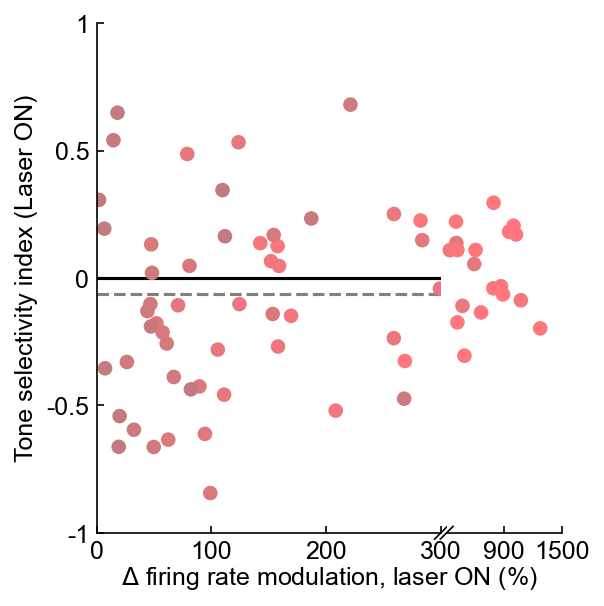

In [21]:
fig = plt.figure(figsize=(4,4.5))
bax = brokenaxes(xlims=( (0,300), (300, 1500) ), width_ratios=[3,1], wspace=0.025)

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mask = np.greater(FRmod_on,3.5)
maskCR = np.greater(FRmod_off,3.5)
maskNCR = np.less(FRmod_off,3.5)
mask = np.logical_and(mask,maskNCR)
X = FRmod_delta_pc
Y = FRmod_on_tuning
C = NCR_CR_cmap((np.array(FRmod_off)-1)/5)
X = X[mask]
Y = Y[mask]
C = C[mask]
print(len(X))
m1 = np.less(X,300)
m2 = np.greater(X,300)
bax.axs[0].scatter(X[m1],Y[m1],c=C[m1],clip_on=True)
bax.axs[1].scatter(X[m2],Y[m2],c=C[m2],clip_on=False)

bax.axs[0].set_ylim([-1,1])
bax.axs[1].set_ylim([-1,1])
bax.axs[0].set_yticks([-1,-0.5,0,0.5,1])
bax.axs[0].set_yticklabels([-1,-0.5,0,0.5,1],fontsize=12)
ylab = bax.axs[0].set_ylabel('Tone selectivity index (Laser ON)',fontsize=12)

bax.axs[1].set_xticks([900,1500])
bax.axs[1].set_xticklabels([str(d) for d in [900,1500]],fontsize=12)
bax.axs[0].set_xticks([0,100,200,300])
bax.axs[0].set_xticklabels([str(d) for d in [0,100,200,300]],fontsize=12)
xlab = bax.set_xlabel(r'$\Delta$ firing rate modulation, laser ON (%)',fontsize=12)

bax.axs[0].axhline(0,c='k',linestyle='-',zorder=-10)
bax.axs[0].axhline(np.mean(Y),c='grey',linestyle='--',zorder=-10)
print(np.mean(Y))
print(ttest_1samp(Y,0).pvalue)
################################################################################################################

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto tuning index NCRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

0.26533707468835427
1.1251270216708813e-17


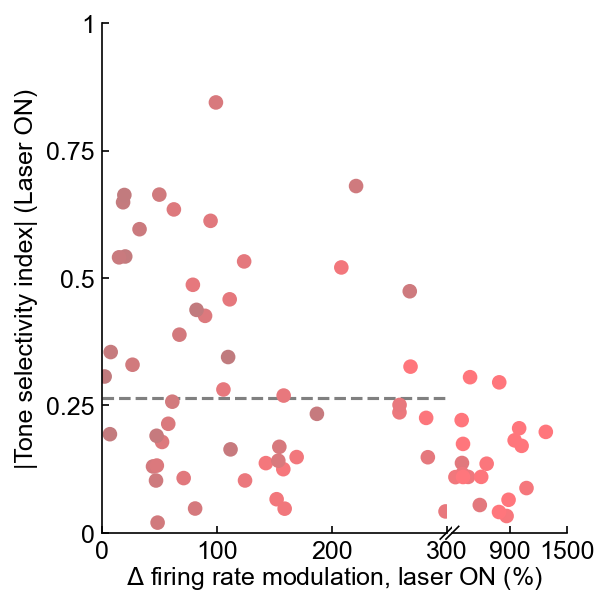

In [79]:
fig = plt.figure(figsize=(4,4.5))
bax = brokenaxes(xlims=( (0,300), (300, 1500) ), width_ratios=[3,1], wspace=0.025)

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mask = np.greater(FRmod_on,3.5)
maskCR = np.greater(FRmod_off,3.5)
maskNCR = np.less(FRmod_off,3.5)
mask = np.logical_and(mask,maskNCR)
X = FRmod_delta_pc
Y = np.abs(FRmod_on_tuning)
C = NCR_CR_cmap((np.array(FRmod_off)-1)/5)
X = X[mask]
Y = Y[mask]
C = C[mask]
m1 = np.less(X,300)
m2 = np.greater(X,300)
bax.axs[0].scatter(X[m1],Y[m1],c=C[m1],clip_on=True)
bax.axs[1].scatter(X[m2],Y[m2],c=C[m2],clip_on=False)

bax.axs[0].set_ylim([0,1])
bax.axs[1].set_ylim([0,1])
bax.axs[0].set_yticks([0,0.25,0.5,0.75,1])
bax.axs[0].set_yticklabels([0,0.25,0.5,0.75,1],fontsize=12)
ylab = bax.axs[0].set_ylabel('|Tone selectivity index| (Laser ON)',fontsize=12)

bax.axs[1].set_xticks([900,1500])
bax.axs[1].set_xticklabels([str(d) for d in [900,1500]],fontsize=12)
bax.axs[0].set_xticks([0,100,200,300])
bax.axs[0].set_xticklabels([str(d) for d in [0,100,200,300]],fontsize=12)
xlab = bax.set_xlabel(r'$\Delta$ firing rate modulation, laser ON (%)',fontsize=12)

# bax.axs[0].axhline(0,c='k',linestyle='-',zorder=-10)
bax.axs[0].axhline(np.mean(Y),c='grey',linestyle='--',zorder=-10)
print(np.mean(Y))
print(ttest_1samp(Y,0).pvalue)
################################################################################################################

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto abs tuning index NCRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [28]:
pearsonr(X,Y)

(-0.35290140145218296, 0.0023616088698387204)

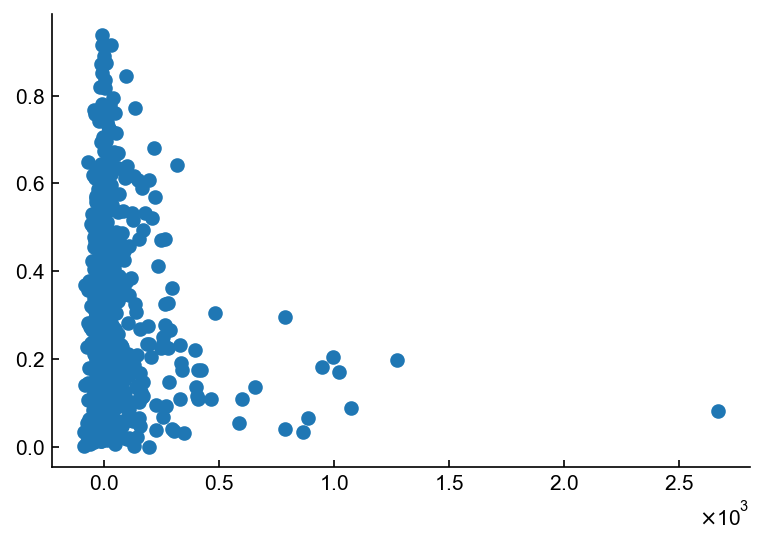

In [18]:
X = FRmod_delta_pc
Y = np.abs(FRmod_on_tuning)

plt.scatter(X,Y)

In [26]:
# spearmanr(X,Y)
pearsonr(X,Y)

(-0.35290140145218296, 0.0023616088698387204)

# Control

In [49]:
EnumSessionControl = []
EnumClustControl = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in opsin_control_animals:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionControl.append(session)
        EnumClustControl.append(clust)

100%|██████████| 167/167 [00:02<00:00, 56.75it/s] 


In [50]:
# EILphases = np.full_like(EnumSessionControl,np.nan)
# error_animals = []

# for idx,session in enumerate(tqdm(EnumSessionControl)):
#     sessionfile = ilep.loadSessionCached(act_directory,session)
    
#     try:
#         animal = sessionfile.meta.animal
#         day = sessionfile.meta.day_of_training
        
#         if sessionfile.meta.task in ['switch','opto switch','tuning switch']:
#             EILphases[idx] = 'switch'

#         elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_early_days:
#             EILphases[idx] = 'pre early'
#         elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal']  and day in learning_phases[animal].pre_late_days:
#             EILphases[idx] = 'pre late'
#         elif sessionfile.meta.task in ['nonreversal','opto nonreversal','tuning nonreversal'] and day in learning_phases[animal].pre_expert_days:
#             EILphases[idx] = 'pre expert'

#         elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_early_days:
#             EILphases[idx] = 'post early'
#         elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_late_days:
#             EILphases[idx] = 'post late'
#         elif sessionfile.meta.task in ['reversal','opto reversal','tuning reversal']  and day in learning_phases[animal].post_expert_days:
#             EILphases[idx] = 'post expert'
#     except Exception as e:
#         #print(ilep.generateDateString(sessionfile))
#         error_animals.append(sessionfile.meta.animal)
#         pass
                             
# error_animals = np.unique(error_animals)
# print('errors for: '+str(error_animals))

In [69]:
Control_FRmod_delta_abs = []
Control_FRmod_delta_pc_baseline = []
Control_FRmod_delta_pc = []
Control_FRmod_delta_pc_target = []
Control_FRmod_delta_pc_nontarget = []
Control_FRmod_on = []
Control_FRmod_off = []
Control_FRmod_on_target = []
Control_FRmod_off_target = []
Control_FRmod_on_nontarget = []
Control_FRmod_off_nontarget = []
Control_FRmod_on_tuning = []
Control_FRmod_off_tuning = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
#     if sessionfile.meta.animal not in opsin_control_animals:
#         continue
    
#     if sessionfile.meta.day_of_training >= animalBehaviors[sessionfile.meta.animal].cloudiness:
#         continue
        
    if not sessionfile.meta.task == 'opto control reversal':
        continue

    on = sessionfile.responsiveness[clust]['laser_on'].FRmodulation
    off = sessionfile.responsiveness[clust]['laser_off'].FRmodulation
    ontarget = sessionfile.responsiveness[clust]['laser_on_target'].FRmodulation
    offtarget = sessionfile.responsiveness[clust]['laser_off_target'].FRmodulation
    onnontarget = sessionfile.responsiveness[clust]['laser_on_nontarget'].FRmodulation
    offnontarget = sessionfile.responsiveness[clust]['laser_off_nontarget'].FRmodulation
    offbaseline = sessionfile.responsiveness[clust]['laser_off'].FRbaseline

    try:
        Control_FRmod_on.append(on)
        Control_FRmod_off.append(off)
        Control_FRmod_on_target.append(ontarget)
        Control_FRmod_off_target.append(offtarget)
        Control_FRmod_on_nontarget.append(onnontarget)
        Control_FRmod_off_nontarget.append(offnontarget)
        Control_FRmod_delta_abs.append( (on-off) )
        Control_FRmod_delta_pc_baseline.append( (on-off)/offbaseline*100 )
        Control_FRmod_delta_pc.append( (on-off)/off*100 )
        Control_FRmod_delta_pc_target.append( (ontarget-offtarget)/offtarget*100 )
        Control_FRmod_delta_pc_nontarget.append( (onnontarget-offnontarget)/offnontarget*100 )
        
        print(f"on: {ontarget}, off: {onnontarget}, ->: {(ontarget-onnontarget) / (ontarget+onnontarget)}")
#         print(f"on: {offtarget}, off: {offnontarget}, ->: {(offtarget-offnontarget) / (offtarget+offnontarget)}")
        
        Control_FRmod_on_tuning.append((ontarget-onnontarget) / (ontarget+onnontarget))
        Control_FRmod_off_tuning.append((offtarget-offnontarget) / (offtarget+offnontarget))
        
    except Exception as e:
        print(session + ': '+ str(e))
        
Control_FRmod_off = np.array(Control_FRmod_off)
Control_FRmod_off_target = np.array(Control_FRmod_off_target)
Control_FRmod_off_nontarget = np.array(Control_FRmod_off_nontarget)
Control_FRmod_delta_pc = np.array(Control_FRmod_delta_pc)
Control_FRmod_delta_pc_target = np.array(Control_FRmod_delta_pc_target)
Control_FRmod_delta_pc_nontarget = np.array(Control_FRmod_delta_pc_nontarget)
Control_FRmod_on_tuning = np.array(Control_FRmod_on_tuning)
Control_FRmod_off_tuning = np.array(Control_FRmod_off_tuning)

15it [00:00, 72.58it/s]

on: 2.1947194719471956, off: 15.533980582524265, ->: -0.7524105585627918
on: 2.566006600660067, off: 2.208737864077669, ->: 0.07482468207898565
on: 4.348184818481848, off: 15.922330097087379, ->: -0.5709842757726765
on: 5.643564356435643, off: 4.77346278317152, ->: 0.08352686055274458
on: 1.6666666666666667, off: 4.142512077294686, ->: -0.42619542619542616
on: 0.75, off: 59.22872340425532, ->: -0.9749911316069528
on: 14.199669966996698, off: 46.39967637540453, ->: -0.5313589725286781
on: 8.861386138613863, off: 4.004854368932037, ->: 0.3774631576981269
on: 0.6101190476190477, off: 0.8, ->: -0.1346559729843816
on: 2.4092409240924093, off: 42.04692556634304, ->: -0.8916127451245376
on: 2.8135313531353137, off: 34.0453074433657, ->: -0.847334780747222
on: 5.470297029702969, off: 1.1003236245954693, ->: 0.6650777202072539
on: 1.559405940594059, off: 4.635922330097086, ->: -0.49658650116369274
on: 1.0148514851485146, off: 2.9530744336569574, ->: -0.4884725642992692
on: 0.9653465346534656, o

23it [00:00, 40.89it/s]

on: 7.025462962962963, off: 16.73809523809524, ->: -0.40871961147214775
on: 0.5902777777777778, off: 0.7738095238095238, ->: -0.13454545454545455
on: 7.083333333333332, off: 11.523809523809526, ->: -0.23864363403710828
on: 3.2870370370370363, off: 5.345238095238098, ->: -0.23843089181734634
on: 15.857843137254902, off: 14.195402298850574, ->: 0.05531651621249192
on: 2.172619047619047, off: 2.307692307692308, ->: -0.03014818599897822
on: 4.212121212121213, off: 2.836538461538462, ->: 0.19515522301682442
on: 5.5092592592592595, off: 3.5357142857142856, ->: 0.21819245393389886


34it [00:00, 35.11it/s]

on: 2.199074074074074, off: 8.357142857142856, ->: -0.5833594386316646
on: 12.650462962962964, off: 2.523809523809524, ->: 0.6673567677119882
on: 0.8333333333333334, off: 1.2878787878787878, ->: -0.21428571428571427
on: 0.19675925925925927, off: 1.9523809523809523, ->: -0.8168949069087551
on: 0.925925925925926, off: 0.6451612903225806, ->: 0.17870722433460084
on: 2.303240740740742, off: 10.666666666666668, ->: -0.6448331251115472
on: 0.8680555555555557, off: 1.1904761904761905, ->: -0.1566265060240963


38it [00:00, 34.07it/s]

on: 4.8263888888888875, off: 8.595238095238097, ->: -0.28080419838864684
on: 0.8333333333333334, off: 1.1428571428571428, ->: -0.15662650602409633
on: 1.458333333333333, off: 1.9047619047619044, ->: -0.13274336283185842
on: 2.7430555555555554, off: 5.500000000000002, ->: -0.3344566133108679
on: 2.037037037037037, off: 17.95238095238095, ->: -0.796188459502382
on: 1.0185185185185182, off: 7.000000000000001, ->: -0.7459584295612011


46it [00:01, 29.40it/s]

on: 21.071428571428566, off: 43.04347826086956, ->: -0.3426979898280456
on: 3.1597222222222228, off: 2.583333333333333, ->: 0.10036275695284175
on: 3.7037037037037024, off: 64.50000000000001, ->: -0.8913928862340483
on: 15.590277777777784, off: 10.14285714285714, ->: 0.21168896256602057
on: 5.636574074074074, off: 4.869047619047619, ->: 0.07305864207246064
on: 1.7824074074074074, off: 5.488095238095237, ->: -0.5096879832620758
on: 1.446759259259259, off: 4.0357142857142865, ->: -0.47222389770191214


50it [00:01, 30.02it/s]

on: 0.7986111111111109, off: 23.55952380952381, ->: -0.9344275648596914
on: 3.125, off: 4.684684684684685, ->: -0.19971160778658978
on: 0.6756756756756757, off: 6.38888888888889, ->: -0.8087141339001064
on: 10.86021505376344, off: 10.192307692307692, ->: 0.03172576367743836
on: 4.946236559139785, off: 6.666666666666668, ->: -0.14814814814814825


57it [00:01, 23.39it/s]

on: 6.113945578231293, off: 5.905017921146954, ->: 0.017383167616337885
on: 2.641509433962264, off: 3.733333333333334, ->: -0.1712707182320443
on: 1.5656565656565657, off: 1.6400709219858156, ->: -0.023212938908908045
on: 2.059748427672955, off: 1.6916666666666662, ->: 0.0981181105662433
on: 12.193396226415095, off: 8.316666666666668, ->: 0.18901597620434815
on: 23.71069182389936, off: 8.133333333333333, ->: 0.4891768051824931
on: 2.010869565217391, off: 1.9675925925925926, ->: 0.010877814318239276


63it [00:02, 18.89it/s]

on: 0.3547854785478548, off: 0.8687943262411346, ->: -0.4200860832137732
on: 0.9827044025157233, off: 2.0083333333333333, ->: -0.342900699153656
on: 2.027777777777778, off: 1.7435897435897443, ->: 0.0753541076487251


66it [00:02, 18.92it/s]

on: 2.261904761904762, off: 2.9597701149425286, ->: -0.13364779874213836
on: 4.34748427672956, off: 21.29166666666667, ->: -0.6608714316376906
on: 4.204119850187266, off: 3.3716475095785445, ->: 0.109886207043514
on: 1.2814465408805031, off: 15.78333333333333, ->: -0.8498138797773928


70it [00:02, 18.62it/s]

on: 0.5482456140350878, off: 1.8969298245614041, ->: -0.5515695067264574
on: 7.29559748427673, off: 12.95, ->: -0.27929047389757844
on: 16.11635220125786, off: 47.24166666666666, ->: -0.49126085413580106
on: 0.43238993710691814, off: 6.325, ->: -0.8720245712823139


74it [00:02, 17.63it/s]

on: 1.9654088050314469, off: 1.3333333333333328, ->: 0.1916110581506199
on: 1.4937106918238994, off: 43.69166666666667, ->: -0.9338852177786129
on: 6.077044025157231, off: 6.166666666666669, ->: -0.007319892127905804


78it [00:03, 16.06it/s]

on: 1.2112403100775193, off: 1.1904761904761907, ->: 0.008645533141210257
on: 1.1781609195402298, off: 1.5300546448087433, ->: -0.12993564098104027
on: 1.4631782945736438, off: 2.71875, ->: -0.30023750217227585
on: 1.1337209302325584, off: 3.052083333333335, ->: -0.45830198506858044


82it [00:03, 16.94it/s]

on: 4.148148148148147, off: 1.1206896551724137, ->: 0.5745970185432068
on: 1.7374213836477983, off: 8.816666666666666, ->: -0.6707585960312258
on: 1.776729559748428, off: 20.058333333333326, ->: -0.8372590389642185
on: 10.691823899371066, off: 34.95833333333334, ->: -0.5315755937107137


86it [00:03, 17.81it/s]

on: 1.70940170940171, off: 5.140692640692639, ->: -0.500911484707312
on: 3.1818181818181817, off: 3.092592592592593, ->: 0.01422055272336991
on: 0.30797101449275366, off: 1.8518518518518516, ->: -0.7148182665424045
on: 1.1788617886178865, off: 1.0666666666666669, ->: 0.04996379435191893


88it [00:03, 17.06it/s]

on: 3.150406504065042, off: 8.170731707317072, ->: -0.4434470377019746
on: 1.5694444444444442, off: 6.705729166666667, ->: -0.6206860379733559
on: 4.724842767295597, off: 23.424999999999997, ->: -0.664307697463596


92it [00:03, 15.37it/s]

on: 0.9065934065934063, off: 1.9981060606060608, ->: -0.3757747286210728
on: 1.218553459119497, off: 2.108333333333333, ->: -0.2674512027978636
on: 2.9943502824858754, off: 10.171957671957674, ->: -0.5451495904779745
on: 0.7468553459119499, off: 1.3416666666666668, ->: -0.2848001204547165


96it [00:04, 16.73it/s]

on: 5.896226415094334, off: 8.066666666666661, ->: -0.1554434484933112
on: 18.73427672955975, off: 22.44166666666666, ->: -0.09003776553293678
on: 0.9455128205128205, off: 0.588235294117647, ->: 0.23294406883835286
on: 0.9487179487179487, off: 1.2922705314009661, ->: -0.1533040378078103


102it [00:04, 18.00it/s]

on: 0.9102564102564105, off: 8.56280193236715, ->: -0.8078220618233171
on: 2.641509433962265, off: 1.1111111111111112, ->: 0.40782122905027945
on: 2.861635220125786, off: 5.874999999999999, ->: -0.34491136506793835
on: 0.7092198581560284, off: 2.635135135135135, ->: -0.5758704685485025
on: 1.111111111111111, off: 20.384615384615383, ->: -0.8966202783300199


104it [00:04, 18.35it/s]

on: 2.2916666666666674, off: 2.1787148594377506, ->: 0.025266704098821147
on: 1.5261044176706824, off: 10.985772357723581, ->: -0.7560550754988405


109it [00:04, 17.32it/s]

on: 7.161949685534596, off: 15.983333333333327, ->: -0.38113094752859933
on: 0.6122448979591837, off: 0.6989247311827957, ->: -0.06610878661087868
on: 2.3427672955974836, off: 13.383333333333328, ->: -0.7020536303465374
on: 9.04761904761905, off: 7.870370370370369, ->: 0.06958561376075074
on: 1.9761904761904767, off: 4.174382716049381, ->: -0.357396322448833
on: 13.809523809523812, off: 24.336419753086407, ->: -0.2759637057157715


117it [00:05, 26.76it/s]

on: 1.425438596491228, off: 0.7751937984496124, ->: 0.2954808806488991
on: 2.7192982456140347, off: 2.1009389671361505, ->: 0.12828399333589632
on: 4.886363636363637, off: 4.982456140350878, ->: -0.009736980324027318
on: 0.6825396825396823, off: 0.8641975308641976, ->: -0.11744583808437875
on: 1.1872146118721463, off: 19.095528455284548, ->: -0.8829335255156319
on: 2.9999999999999996, off: 3.680555555555557, ->: -0.10187110187110215
on: 18.150406504065035, off: 5.018315018315016, ->: 0.5668025951740561
on: 6.357142857142855, off: 7.746913580246915, ->: -0.09853695135675902
on: 1.378205128205128, off: 6.599462365591399, ->: -0.6544841886988078


125it [00:05, 32.49it/s]

on: 1.4682539682539684, off: 0.617283950617284, ->: 0.40803382663847776
on: 7.285714285714288, off: 11.99074074074074, ->: -0.2440815206203251
on: 7.039682539682541, off: 8.356481481481485, ->: -0.0855277288543323
on: 5.928571428571427, off: 6.62037037037037, ->: -0.05512806999051345
on: 1.7142857142857137, off: 5.632716049382716, ->: -0.5333373342135271
on: 5.706349206349207, off: 7.669753086419758, ->: -0.14678445462636402
on: 1.07936507936508, off: 10.030864197530867, ->: -0.805698864989285
on: 5.73809523809524, off: 11.74382716049383, ->: -0.3435395596358041
on: 2.083333333333333, off: 9.307359307359308, ->: -0.6342042755344418


133it [00:05, 35.44it/s]

on: 2.1190476190476195, off: 3.7037037037037037, ->: -0.2721490231712857
on: 0.9365079365079366, off: 4.5679012345679, ->: -0.6597244472925343
on: 5.190476190476192, off: 5.385802469135803, ->: -0.018468337015883556
on: 1.7878787878787878, off: 3.671497584541063, ->: -0.3450245354356046
on: 1.0476190476190481, off: 3.0324074074074074, ->: -0.48646458096936274


137it [00:05, 26.35it/s]

on: 5.643939393939393, off: 24.850877192982452, ->: -0.6298427060315636
on: 9.265091863517059, off: 12.44350282485875, ->: -0.14641256179717702
on: 2.1391076115485568, off: 1.3841807909604522, ->: 0.21426767676767675
on: 0.5322128851540616, off: 1.714285714285714, ->: -0.5261845386533666
on: 0.4921259842519688, off: 2.259887005649717, ->: -0.6423519903010707
on: 1.5511551155115508, off: 1.2244897959183674, ->: 0.11768988109682106


144it [00:06, 26.14it/s]

on: 0.3741496598639456, off: 1.9060283687943265, ->: -0.6718241688486869
on: 2.8805774278215224, off: 5.621468926553674, ->: -0.32238021112666304
on: 3.6417322834645662, off: 5.953389830508476, ->: -0.2409200758036756
on: 0.8163265306122449, off: 0.4444444444444444, ->: 0.29496402877697847
on: 2.8333333333333335, off: 3.734567901234568, ->: -0.13721804511278193


147it [00:06, 25.77it/s]

on: 4.363517060367454, off: 4.484463276836161, ->: -0.01366935863997769
on: 14.271653543307082, off: 17.026836158192083, ->: -0.0880292512885384
on: 24.68503937007875, off: 5.367231638418079, ->: 0.6428069188581073
on: 15.833333333333327, off: 24.87288135593221, ->: -0.22206800832755066
on: 4.0476190476190474, off: 12.88095238095238, ->: -0.5218002812939522


153it [00:06, 25.63it/s]

on: 0.3831417624521073, off: 1.130952380952381, ->: -0.49389968368730225
on: 2.6543209876543195, off: 6.478758169934641, ->: -0.41874565152569354
on: 1.60144927536232, off: 4.650793650793649, ->: -0.4877200728517022
on: 1.1351706036745401, off: 1.4124293785310735, ->: -0.10883136159252657
on: 2.666666666666666, off: 5.378787878787879, ->: -0.337099811676083
on: 1.5476190476190481, off: 0.9674329501915707, ->: 0.23068552774755194


159it [00:06, 20.98it/s]

on: 1.3085399449035815, off: 6.545584045584047, ->: -0.6667890788359352
on: 1.4238845144356955, off: 0.9887005649717516, ->: 0.18038076798967398
on: 1.3320209973753276, off: 2.916666666666667, ->: -0.3729729729729731
on: 6.31889763779528, off: 13.114406779661012, ->: -0.3496836665493467


165it [00:07, 23.37it/s]

on: 6.935695538057748, off: 15.98870056497176, ->: -0.39490702333997957
on: 1.276041666666667, off: 1.2307692307692306, ->: 0.018059773054179495
on: 1.0677083333333335, off: 0.6515151515151514, ->: 0.242082071054806
on: 1.111111111111111, off: 1.1819727891156464, ->: -0.030902348578492105
on: 3.2414698162729656, off: 6.468926553672316, ->: -0.33237126626351476
on: 7.007874015748034, off: 24.053672316384194, ->: -0.5487749424439569


171it [00:07, 24.56it/s]

on: 1.1594202898550723, off: 1.5598290598290596, ->: -0.14724974376494707
on: 0.6167979002624673, off: 1.0805084745762716, ->: -0.2732038135176753
on: 0.802469135802469, off: 0.28368794326241137, ->: 0.4776299879081014
on: 0.4706790123456791, off: 2.2977346278317152, ->: -0.6599648220809091
on: 1.3750000000000002, off: 1.2449799196787152, ->: 0.049626365204062016
on: 1.7129629629629628, off: 1.3945578231292517, ->: 0.10246275463666764


174it [00:07, 24.27it/s]

on: 7.421259842519691, off: 9.653954802259888, ->: -0.13075647985618735
on: 4.957865168539327, off: 28.72459349593495, ->: -0.7056114449407157
on: 12.43445692883895, off: 36.60060975609756, ->: -0.49283409733145966
on: 1.1891385767790257, off: 1.178861788617886, ->: 0.004339859195679262


180it [00:07, 23.15it/s]

on: 10.510299625468164, off: 14.430894308943088, ->: -0.15719354469497537
on: 10.196629213483144, off: 5.685975609756099, ->: 0.2839996117719374
on: 4.667968750000001, off: 7.880747126436782, ->: -0.2560244735853444
on: 3.796816479400749, off: 7.809959349593496, ->: -0.34575862662633117
on: 0.4447565543071162, off: 2.3018292682926824, ->: -0.6761386076870309


183it [00:07, 18.48it/s]

on: 2.8397027600849243, off: 2.7293064876957502, ->: 0.01982332358905104
on: 0.6481481481481479, off: 2.637969094922739, ->: -0.6055234185482369
on: 0.6653746770025841, off: 4.346264367816089, ->: -0.7344682364183879


186it [00:08, 19.61it/s]

on: 1.9971264367816088, off: 3.27932098765432, ->: -0.24300337854873674
on: 0.759958071278826, off: 1.6444444444444442, ->: -0.3678611910367076
on: 2.9026217228464413, off: 4.928861788617887, ->: -0.25873004301232067
on: 0.3603603603603604, off: 9.649122807017545, ->: -0.9279962103268593
on: 2.4250936329588018, off: 4.634146341463414, ->: -0.3129306719290867


192it [00:08, 21.13it/s]

on: 1.0714285714285714, off: 41.666666666666664, ->: -0.9498607242339834
on: 6.159999999999999, off: 6.113569321533924, ->: 0.0037829809120491845
on: 1.1095505617977526, off: 0.8180894308943091, ->: 0.15120101886680667
on: 2.3127340823970046, off: 4.288617886178863, ->: -0.29931502110288516
on: 1.1376404494382022, off: 2.276422764227644, ->: -0.333556306230978


198it [00:08, 21.81it/s]

on: 0.4769076305220884, off: 1.0526315789473681, ->: -0.37640352392468457
on: 2.2983870967741935, off: 0.9027777777777778, ->: 0.43596920923722887
on: 3.4831460674157304, off: 12.962398373983726, ->: -0.576402462098199
on: 0.36985018726591823, off: 1.8953252032520318, ->: -0.6734467548834272
on: 1.7415730337078665, off: 5.95020325203252, ->: -0.547159727737654


201it [00:08, 21.42it/s]

on: 5.806794055201701, off: 3.7192393736017886, ->: 0.2191420696979559
on: 5.973782771535586, off: 17.77439024390245, ->: -0.49690590786481187
on: 3.071161048689139, off: 6.697154471544717, ->: -0.3711994576080986
on: 1.9241573033707868, off: 1.71239837398374, ->: 0.05823063034775102
on: 1.0747663551401871, off: 0.7989690721649485, ->: 0.14719115567553678


207it [00:09, 18.97it/s]

on: 1.869918699186992, off: 1.7670682730923697, ->: 0.02827901966065175
on: 0.9456928838951308, off: 2.1443089430894307, ->: -0.38790140793023176
on: 1.7509363295880152, off: 1.1585365853658522, ->: 0.2036106750392471
on: 1.0360360360360361, off: 1.3235294117647056, ->: -0.12184166198764726


210it [00:09, 20.00it/s]

on: 1.1023622047244097, off: 1.7391304347826086, ->: -0.22409638554216854
on: 4.250936329588016, off: 2.210365853658537, ->: 0.3158141219923832
on: 6.044007490636706, off: 11.783536585365852, ->: -0.3219472671199314
on: 7.303370786516852, off: 13.399390243902442, ->: -0.29445441834683284
on: 9.440789473684209, off: 19.777777777777782, ->: -0.3537814915813967
on: 15.914634146341463, off: 46.22659176029964, ->: -0.48779143268750197


219it [00:09, 28.59it/s]

on: 2.626666666666667, off: 3.2617187500000027, ->: -0.10784825353582742
on: 0.8059210526315794, off: 7.0611111111111144, ->: -0.7951143364213303
on: 2.3997493734335826, off: 4.390096618357487, ->: -0.2931358453977065
on: 2.165570175438596, off: 2.822222222222222, ->: -0.13165184001875935
on: 4.555555555555552, off: 14.707207207207203, ->: -0.5270091199625849
on: 23.042763157894747, off: 47.59444444444441, ->: -0.3475743467205891
on: 13.146929824561404, off: 25.238888888888887, ->: -0.3150111022665381
on: 6.547619047619048, off: 16.01851851851852, ->: -0.41969519343493555
on: 4.079601990049751, off: 9.85294117647059, ->: -0.4143779866617656


228it [00:09, 34.65it/s]

on: 2.8378378378378377, off: 9.444444444444445, ->: -0.5378973105134475
on: 2.526041666666666, off: 1.949152542372882, ->: 0.12890817634875207
on: 7.9315476190476195, off: 43.17528735632182, ->: -0.6896091247728343
on: 0.6060606060606061, off: 0.8658008658008657, ->: -0.17647058823529405
on: 0.6414473684210525, off: 8.53333333333333, ->: -0.8601716184238831
on: 1.4646464646464648, off: 1.7034313725490198, ->: -0.07537217207830267
on: 2.903225806451613, off: 4.070512820512821, ->: -0.16738324684951822
on: 3.541666666666667, off: 13.633333333333336, ->: -0.5875788452207665
on: 4.3584656084656075, off: 14.263565891472865, ->: -0.5319022407968746


232it [00:09, 35.31it/s]

on: 0.5043859649122807, off: 0.888888888888889, ->: -0.2759706190975866
on: 1.798245614035088, off: 32.277777777777764, ->: -0.8944568388536124
on: 25.970394736842106, off: 28.577777777777786, ->: -0.04779964058808486
on: 1.3541666666666663, off: 1.4545454545454546, ->: -0.03573836817262321


240it [00:10, 29.63it/s]

on: 11.148459383753494, off: 10.440705128205131, ->: 0.03278284600389814
on: 3.453815261044177, off: 3.2746478873239444, ->: 0.026628275992517957
on: 5.344352617079888, off: 3.8629283489096577, ->: 0.16089704155248566
on: 5.359848484848484, off: 2.631578947368422, ->: 0.3413995260072344
on: 6.369949494949497, off: 5.453216374269006, ->: 0.077537026107973
on: 5.9756097560975645, off: 2.4235474006116204, ->: 0.4229069999777993
on: 2.8674540682414684, off: 4.819819819819822, ->: -0.25397374674141276


248it [00:10, 31.49it/s]

on: 1.171875, off: 1.388888888888889, ->: -0.08474576271186446
on: 1.1694677871148458, off: 0.7605177993527508, ->: 0.21189276781625388
on: 2.809343434343434, off: 2.2587719298245608, ->: 0.10863436700976863
on: 4.266666666666666, off: 8.380952380952381, ->: -0.3253012048192772
on: 20.80808080808081, off: 17.799707602339176, ->: 0.07792140730158204
on: 3.5240963855421685, off: 1.3725490196078431, ->: 0.43939211192859723
on: 9.330484330484333, off: 5.902061855670103, ->: 0.2250721864169026
on: 18.909465020576135, off: 21.8581081081081, ->: -0.07232814860537501


256it [00:10, 32.80it/s]

on: 17.834595959595962, off: 16.461988304093566, ->: 0.04002170143093821
on: 4.863945578231292, off: 2.364341085271317, ->: 0.34580871087765386
on: 3.066666666666665, off: 12.09558823529412, ->: -0.5954867285247812
on: 1.7901234567901236, off: 2.0604395604395602, ->: -0.07020170879943617
on: 6.278248587570622, off: 12.725000000000001, ->: -0.33924470243713906
on: 30.938320209973757, off: 21.96902654867257, ->: 0.1695283209384411
on: 5.905511811023625, off: 6.396396396396397, ->: -0.039903125360396516
on: 0.880503144654088, off: 0.6666666666666666, ->: 0.1382113821138211


260it [00:10, 33.12it/s]

on: 9.141414141414144, off: 22.595029239766074, ->: -0.4239169127038966
on: 2.688679245283019, off: 4.166666666666667, ->: -0.21559633027522943
on: 3.6444444444444457, off: 5.120772946859904, ->: -0.16843033509700162
on: 20.229885057471265, off: 37.29166666666667, ->: -0.29661546147121276


269it [00:10, 30.07it/s]

on: 1.2916666666666667, off: 1.3968253968253967, ->: -0.03911439114391139
on: 20.328282828282838, off: 20.29970760233918, ->: 0.0007033384039128065
on: 0.45289855072463775, off: 1.0852713178294575, ->: -0.4111202410298549
on: 1.4837398373983735, off: 8.347222222222223, ->: -0.6981496157954586
on: 3.2941834451901544, off: 10.82199546485261, ->: -0.5332754754409421
on: 8.982843137254902, off: 4.236641221374048, ->: 0.35903079024279755
on: 1.9328703703703707, off: 1.5833333333333333, ->: 0.09940750493745895
on: 4.507829977628636, off: 2.182539682539683, ->: 0.3475578201504717


279it [00:11, 35.82it/s]

on: 0.1754385964912281, off: 0.9999999999999998, ->: -0.7014925373134328
on: 2.416107382550334, off: 4.087301587301588, ->: -0.2569720299766579
on: 17.125279642058164, off: 11.326530612244891, ->: 0.20380949324432773
on: 2.4888143176733784, off: 3.0328798185941044, ->: -0.09853235030662161
on: 24.798657718120808, off: 17.46031746031747, ->: 0.17365163794950633
on: 11.096196868008954, off: 12.312925170068027, ->: -0.051976673882940076
on: 3.563829787234042, off: 115.02398081534776, ->: -0.9398955125467768
on: 3.5498687664041984, off: 5.253333333333334, ->: -0.19350510730407114
on: 1.203703703703704, off: 4.173441734417344, ->: -0.5522889542209155
on: 1.884787472035794, off: 6.68367346938775, ->: -0.5600639403223656


288it [00:11, 25.20it/s]

on: 0.6060606060606061, off: 14.494047619047619, ->: -0.9197276473750224
on: 5.671140939597316, off: 2.8174603174603168, ->: 0.33617795626392255
on: 0.5555555555555556, off: 1.4604810996563575, ->: -0.4488636363636364
on: 2.706935123042506, off: 4.178004535147392, ->: -0.21366482280712404
on: 0.9807256235827666, off: 1.247126436781609, ->: -0.1195774252421731
on: 0.29082774049217014, off: 0.566893424036281, ->: -0.3218594748048258
on: 1.9886363636363633, off: 1.8402777777777777, ->: 0.03874690849134372
on: 13.734848484848486, off: 52.13734567901234, ->: -0.5829849404839235


-0.3472011326455265
1.3011001694385735e-18


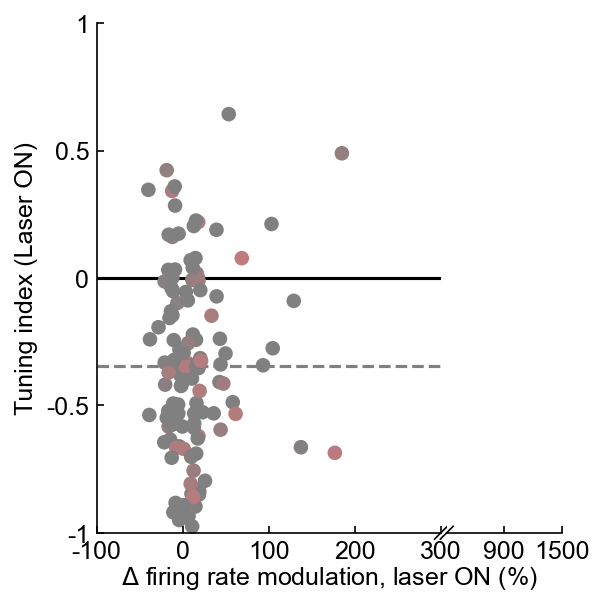

In [71]:
fig = plt.figure(figsize=(4,4.5))
bax = brokenaxes(xlims=( (-100,300), (300, 1500) ), width_ratios=[3,1], wspace=0.025)

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mask = np.greater(Control_FRmod_on,3.5)
maskCR = np.greater(Control_FRmod_off,3.5)
maskNCR = np.less(Control_FRmod_off,3.5)
mask = np.logical_and(mask,maskCR)
X = Control_FRmod_delta_pc
Y = Control_FRmod_on_tuning
C = NCR_CR_cmap((np.array(Control_FRmod_off)-1)/5)
X = X[mask]
Y = Y[mask]
C = C[mask]
m1 = np.less(X,300)
m2 = np.greater(X,300)
bax.axs[0].scatter(X[m1],Y[m1],c=C[m1],clip_on=False)
bax.axs[1].scatter(X[m2],Y[m2],c=C[m2],clip_on=False)

bax.axs[0].set_ylim([-1,1])
bax.axs[1].set_ylim([-1,1])
bax.axs[0].set_yticks([-1,-0.5,0,0.5,1])
bax.axs[0].set_yticklabels([-1,-0.5,0,0.5,1],fontsize=12)
ylab = bax.axs[0].set_ylabel('Tuning index (Laser ON)',fontsize=12)

bax.axs[1].set_xticks([900,1500])
bax.axs[1].set_xticklabels([str(d) for d in [900,1500]],fontsize=12)
bax.axs[0].set_xticks([-100,0,100,200,300])
bax.axs[0].set_xticklabels([str(d) for d in [-100,0,100,200,300]],fontsize=12)
xlab = bax.set_xlabel(r'$\Delta$ firing rate modulation, laser ON (%)',fontsize=12)

bax.axs[0].axhline(0,c='k',linestyle='-',zorder=-10)
bax.axs[0].axhline(np.mean(Y),c='grey',linestyle='--',zorder=-10)
print(np.mean(Y))
print(ttest_1samp(Y,0).pvalue)
################################################################################################################

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto Control tuning index CRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

-0.16336346812151648
0.12798285040272495


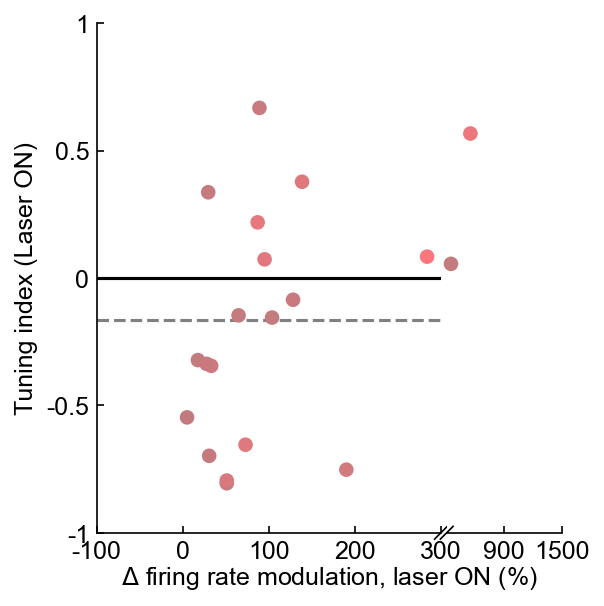

In [72]:
fig = plt.figure(figsize=(4,4.5))
bax = brokenaxes(xlims=( (-100,300), (300, 1500) ), width_ratios=[3,1], wspace=0.025)

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mask = np.greater(Control_FRmod_on,3.5)
maskCR = np.greater(Control_FRmod_off,3.5)
maskNCR = np.less(Control_FRmod_off,3.5)
mask = np.logical_and(mask,maskNCR)
X = Control_FRmod_delta_pc
Y = Control_FRmod_on_tuning
C = NCR_CR_cmap((np.array(Control_FRmod_off)-1)/5)
X = X[mask]
Y = Y[mask]
C = C[mask]
m1 = np.less(X,300)
m2 = np.greater(X,300)
bax.axs[0].scatter(X[m1],Y[m1],c=C[m1],clip_on=False)
bax.axs[1].scatter(X[m2],Y[m2],c=C[m2],clip_on=False)

bax.axs[0].set_ylim([-1,1])
bax.axs[1].set_ylim([-1,1])
bax.axs[0].set_yticks([-1,-0.5,0,0.5,1])
bax.axs[0].set_yticklabels([-1,-0.5,0,0.5,1],fontsize=12)
ylab = bax.axs[0].set_ylabel('Tuning index (Laser ON)',fontsize=12)

bax.axs[1].set_xticks([900,1500])
bax.axs[1].set_xticklabels([str(d) for d in [900,1500]],fontsize=12)
bax.axs[0].set_xticks([-100,0,100,200,300])
bax.axs[0].set_xticklabels([str(d) for d in [-100,0,100,200,300]],fontsize=12)
xlab = bax.set_xlabel(r'$\Delta$ firing rate modulation, laser ON (%)',fontsize=12)

bax.axs[0].axhline(0,c='k',linestyle='-',zorder=-10)
bax.axs[0].axhline(np.mean(Y),c='grey',linestyle='--',zorder=-10)
print(np.mean(Y))
print(ttest_1samp(Y,0).pvalue)
################################################################################################################

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto Control tuning index NCRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

NormaltestResult(statistic=8.334242208351215, pvalue=0.015496809667035476)
NormaltestResult(statistic=4.712342384041997, pvalue=0.09478243307379727)
0.008303893187087135


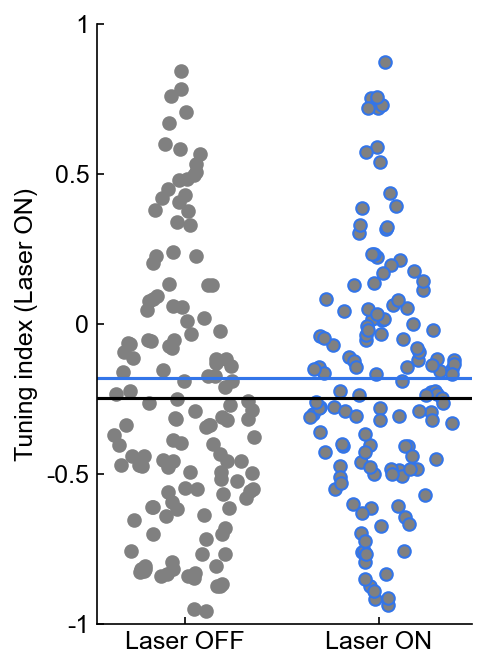

In [32]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset=0.15

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mask = np.greater(FRmod_on,3.5)
maskCR = np.greater(FRmod_off,3.5)
maskNCR = np.less(FRmod_off,3.5)
mask = np.logical_and(mask,maskCR)

Y1 = FRmod_off_tuning[mask]
Y2 = FRmod_on_tuning[mask]

X,Y = ilep.violin(Y1)
ax.scatter(X,Y,c=CR_COLOR)
X,Y = ilep.violin(Y2)
ax.scatter(X+1,Y,fc=CR_COLOR,ec=LASER_COLOR)

ax.set_xticks([0,1])
ax.set_xticklabels(['Laser OFF','Laser ON'],fontsize=12)

################################################################################################################

ax.set_ylim([-1,1])
ax.set_ylim([-1,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_yticklabels([-1,-0.5,0,0.5,1],fontsize=12)
ylab = ax.set_ylabel('Tuning index (Laser ON)',fontsize=12)

print(normaltest(Y1))
print(normaltest(Y2))
ax.axhline(np.mean(Y1),c='k')
ax.axhline(np.mean(Y2),c=LASER_COLOR)
print(wilcoxon(Y1,Y2).pvalue)

################################################################################################################

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto tuning index CRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# Nontarget CR Laser Modulation

NormaltestResult(statistic=89.93101840386437, pvalue=2.96297152380252e-20)
NormaltestResult(statistic=109.03931209834042, pvalue=2.100942771270711e-24)
3.68084851933392e-07


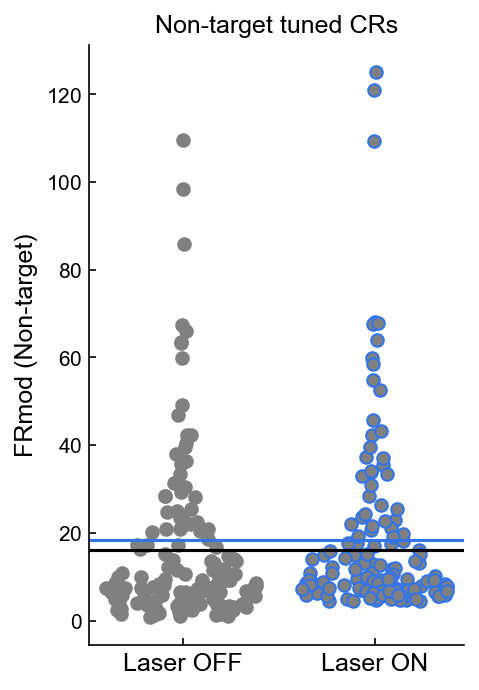

In [53]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset=0.15

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mask = np.greater(FRmod_on,3.5)
masknontarget = np.less(FRmod_on_tuning,0)
mask = np.logical_and(mask,masknontarget)

Y1 = FRmod_off_nontarget[mask]
Y2 = FRmod_on_nontarget[mask]
NY1 = Y1
NY2 = Y2

X,Y = ilep.violin(Y1)
ax.scatter(X,Y,c=CR_COLOR)
X,Y = ilep.violin(Y2)
ax.scatter(X+1,Y,fc=CR_COLOR,ec=LASER_COLOR)

ax.set_xticks([0,1])
ax.set_xticklabels(['Laser OFF','Laser ON'],fontsize=12)

ax.set_title('Non-target tuned CRs')

################################################################################################################

# ax.set_ylim([-1,1])
# ax.set_ylim([-1,1])
# ax.set_yticks([-1,-0.5,0,0.5,1])
# ax.set_yticklabels([-1,-0.5,0,0.5,1],fontsize=12)
ylab = ax.set_ylabel('FRmod (Non-target)',fontsize=12)

print(normaltest(Y1))
print(normaltest(Y2))
ax.axhline(np.mean(Y1),c='k')
ax.axhline(np.mean(Y2),c=LASER_COLOR)
print(wilcoxon(Y1,Y2).pvalue)

################################################################################################################

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto suppression nontarget CRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

# Target CR Laser Modulation

NormaltestResult(statistic=81.7561072931797, pvalue=1.7655778442294838e-18)
NormaltestResult(statistic=93.68016542511157, pvalue=4.545802320982677e-21)
2.820789345981662e-08


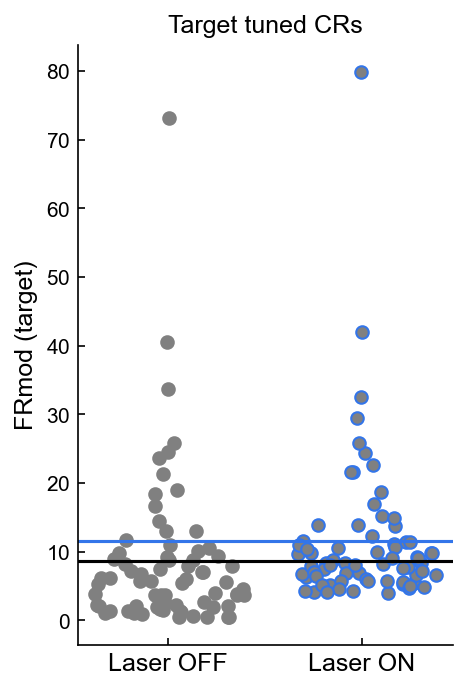

In [63]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset=0.15

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mask = np.greater(FRmod_on,3.5)
masktarget = np.greater(FRmod_on_tuning,0)
mask = np.logical_and(mask,masktarget)

Y1 = FRmod_off_target[mask]
Y2 = FRmod_on_target[mask]
TY1 = Y1
TY2 = Y2

X,Y = ilep.violin(Y1)
ax.scatter(X,Y,c=CR_COLOR)
X,Y = ilep.violin(Y2)
ax.scatter(X+1,Y,fc=CR_COLOR,ec=LASER_COLOR)

ax.set_xticks([0,1])
ax.set_xticklabels(['Laser OFF','Laser ON'],fontsize=12)

ax.set_title('Target tuned CRs')

################################################################################################################

# ax.set_ylim([-1,1])
# ax.set_ylim([-1,1])
# ax.set_yticks([-1,-0.5,0,0.5,1])
# ax.set_yticklabels([-1,-0.5,0,0.5,1],fontsize=12)
ylab = ax.set_ylabel('FRmod (target)',fontsize=12)

print(normaltest(Y1))
print(normaltest(Y2))
ax.axhline(np.mean(Y1),c='k')
ax.axhline(np.mean(Y2),c=LASER_COLOR)
print(wilcoxon(Y1,Y2).pvalue)

################################################################################################################

artists = [xlab,ylab]
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto suppression target CRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

NormaltestResult(statistic=81.7561072931797, pvalue=1.7655778442294838e-18)
NormaltestResult(statistic=93.68016542511157, pvalue=4.545802320982677e-21)
NormaltestResult(statistic=89.93101840386437, pvalue=2.96297152380252e-20)
NormaltestResult(statistic=109.03931209834042, pvalue=2.100942771270711e-24)
2.820789345981662e-08
3.68084851933392e-07


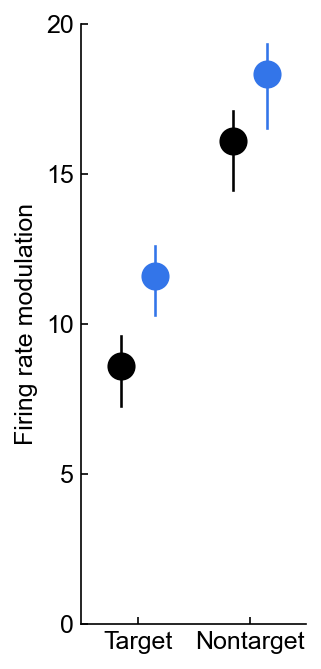

In [10]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(1.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset=0.15

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

tempmask = np.greater(FRmod_on,3.5)
masktarget = np.greater(FRmod_on_tuning,0)
masknontarget = np.less(FRmod_on_tuning,0)

mask = np.logical_and(tempmask,masktarget)
TY1 = (FRmod_off_target[mask])
TY2 = (FRmod_on_target[mask])

mask = np.logical_and(tempmask,masknontarget)
NY1 = (FRmod_off_nontarget[mask])
NY2 = (FRmod_on_nontarget[mask])

################################################################################################################

m = np.mean(TY1)
s = sem(TY1)
ax.scatter([0-offset],[m],c='k',s=summary_size,lw=summary_width)
ax.plot([0-offset]*2,[m-s,m+1],c='k',lw=summary_width)

m = np.mean(TY2)
s = sem(TY2)
ax.scatter([0+offset],[m],c=LASER_COLOR,s=summary_size,lw=summary_width)
ax.plot([0+offset]*2,[m-s,m+1],c=LASER_COLOR,lw=summary_width)

m = np.mean(NY1)
s = sem(NY1)
ax.scatter([1-offset],[m],c='k',s=summary_size,lw=summary_width)
ax.plot([1-offset]*2,[m-s,m+1],c='k',lw=summary_width)

m = np.mean(NY2)
s = sem(NY2)
ax.scatter([1+offset],[m],c=LASER_COLOR,s=summary_size,lw=summary_width)
ax.plot([1+offset]*2,[m-s,m+1],c=LASER_COLOR,lw=summary_width)


ax.set_xticks([0,1])
ax.set_xticklabels(['Target','Nontarget'],fontsize=12)

################################################################################################################

ax.set_xlim([-0.5,1.5])

ax.set_ylim([0,20])
ax.set_yticks([0,5,10,15,20])
ax.set_yticklabels([0,5,10,15,20],fontsize=12)
ylab = ax.set_ylabel('Firing rate modulation',fontsize=12)

print(normaltest(TY1))
print(normaltest(TY2))
print(normaltest(NY1))
print(normaltest(NY2))
print(wilcoxon(TY1,TY2).pvalue)
print(wilcoxon(NY1,NY2).pvalue)
# ax.axhline(np.mean(Y1),c='k')
# ax.axhline(np.mean(Y2),c=LASER_COLOR)
# print(wilcoxon(Y1,Y2).pvalue)

################################################################################################################

artists = []
fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto suppression target nontarget CRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')

In [11]:
print(np.sum(np.isfinite(TY1)))
print(np.sum(np.isfinite(TY2)))
print(np.sum(np.isfinite(NY1)))
print(np.sum(np.isfinite(NY2)))

print(normaltest(TY1))
print(normaltest(TY2))
print(normaltest(NY1))
print(normaltest(NY2))
print(wilcoxon(TY1,TY2).pvalue)
print(wilcoxon(NY1,NY2).pvalue)

71
71
138
138
NormaltestResult(statistic=81.7561072931797, pvalue=1.7655778442294838e-18)
NormaltestResult(statistic=93.68016542511157, pvalue=4.545802320982677e-21)
NormaltestResult(statistic=89.93101840386437, pvalue=2.96297152380252e-20)
NormaltestResult(statistic=109.03931209834042, pvalue=2.100942771270711e-24)
2.820789345981662e-08
3.68084851933392e-07


In [64]:
A = TY2-TY1
B = NY2-NY1
mannwhitneyu(A,B)

MannwhitneyuResult(statistic=5665.0, pvalue=0.06450667157747998)

In [61]:
np.mean(A)

3.010552878055836

In [62]:
np.mean(B)

2.239715214968975

NormaltestResult(statistic=12.010682750938017, pvalue=0.002465547527485127)
NormaltestResult(statistic=89.88569362232073, pvalue=3.030886190041404e-20)
0.06450667157747998


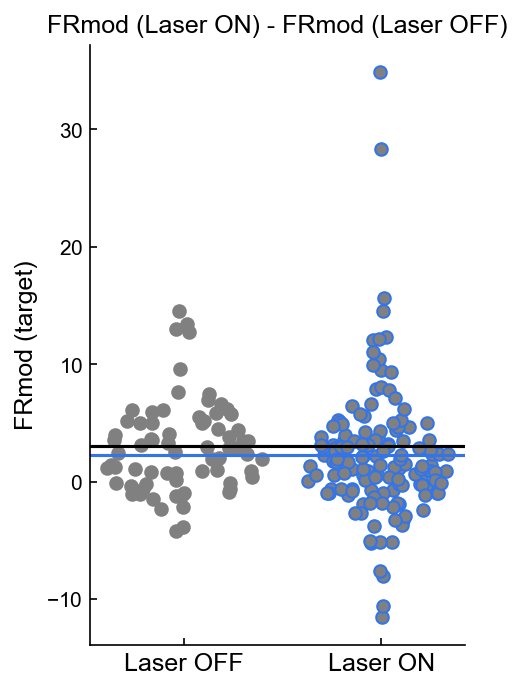

In [67]:
def add_axis_size(fig, ax_w, ax_h, left, bottom):
    fig_w, fig_h = fig.get_size_inches()
    ax = fig.add_axes([left/fig_w, bottom/fig_h, ax_w/fig_w, ax_h/fig_h])
    return ax

def make_axis_size(ax_w, ax_h, left=.3, bottom=.3, right=0, top=0):
    fig_w = (ax_w + left + right) * 1.05
    fig_h = (ax_h + bottom + top) * 1.05
    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = add_axis_size(fig, ax_w, ax_h, left, bottom)
    return fig, ax

fig,ax = make_axis_size(2.5, 4, left=.3, bottom=.3, right=0, top=0)
switch_offset = 0
offset=0.15

################################################################################################################

size = 20
summary_size=150
summary_width=1.25#0.75

mask = np.greater(FRmod_on,3.5)
masktarget = np.greater(FRmod_on_tuning,0)
mask = np.logical_and(mask,masktarget)

Y1 = TY2-TY1#FRmod_off_target[mask]
Y2 = NY2-NY1#FRmod_on_target[mask]

X,Y = ilep.violin(Y1)
ax.scatter(X,Y,c=CR_COLOR)
X,Y = ilep.violin(Y2)
ax.scatter(X+1,Y,fc=CR_COLOR,ec=LASER_COLOR)

ax.set_xticks([0,1])
ax.set_xticklabels(['Laser OFF','Laser ON'],fontsize=12)

ax.set_title('FRmod (Laser ON) - FRmod (Laser OFF)')

################################################################################################################

# ax.set_ylim([-1,1])
# ax.set_ylim([-1,1])
# ax.set_yticks([-1,-0.5,0,0.5,1])
# ax.set_yticklabels([-1,-0.5,0,0.5,1],fontsize=12)
ylab = ax.set_ylabel('FRmod (target)',fontsize=12)

print(normaltest(Y1))
print(normaltest(Y2))
ax.axhline(np.mean(Y1),c='k')
ax.axhline(np.mean(Y2),c=LASER_COLOR)
print(mannwhitneyu(Y1,Y2).pvalue)

################################################################################################################

artists = [xlab,ylab]
# fig.savefig(os.path.join('D:\\\\Figures','Manuscript Figures','Opto suppression target CRs V'+str(current_version)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')